# Experimental Results for Semantic Chunking

In [2]:
from plots import *

# 1. Overview

## BEIR Synthetic Datasets

### Average

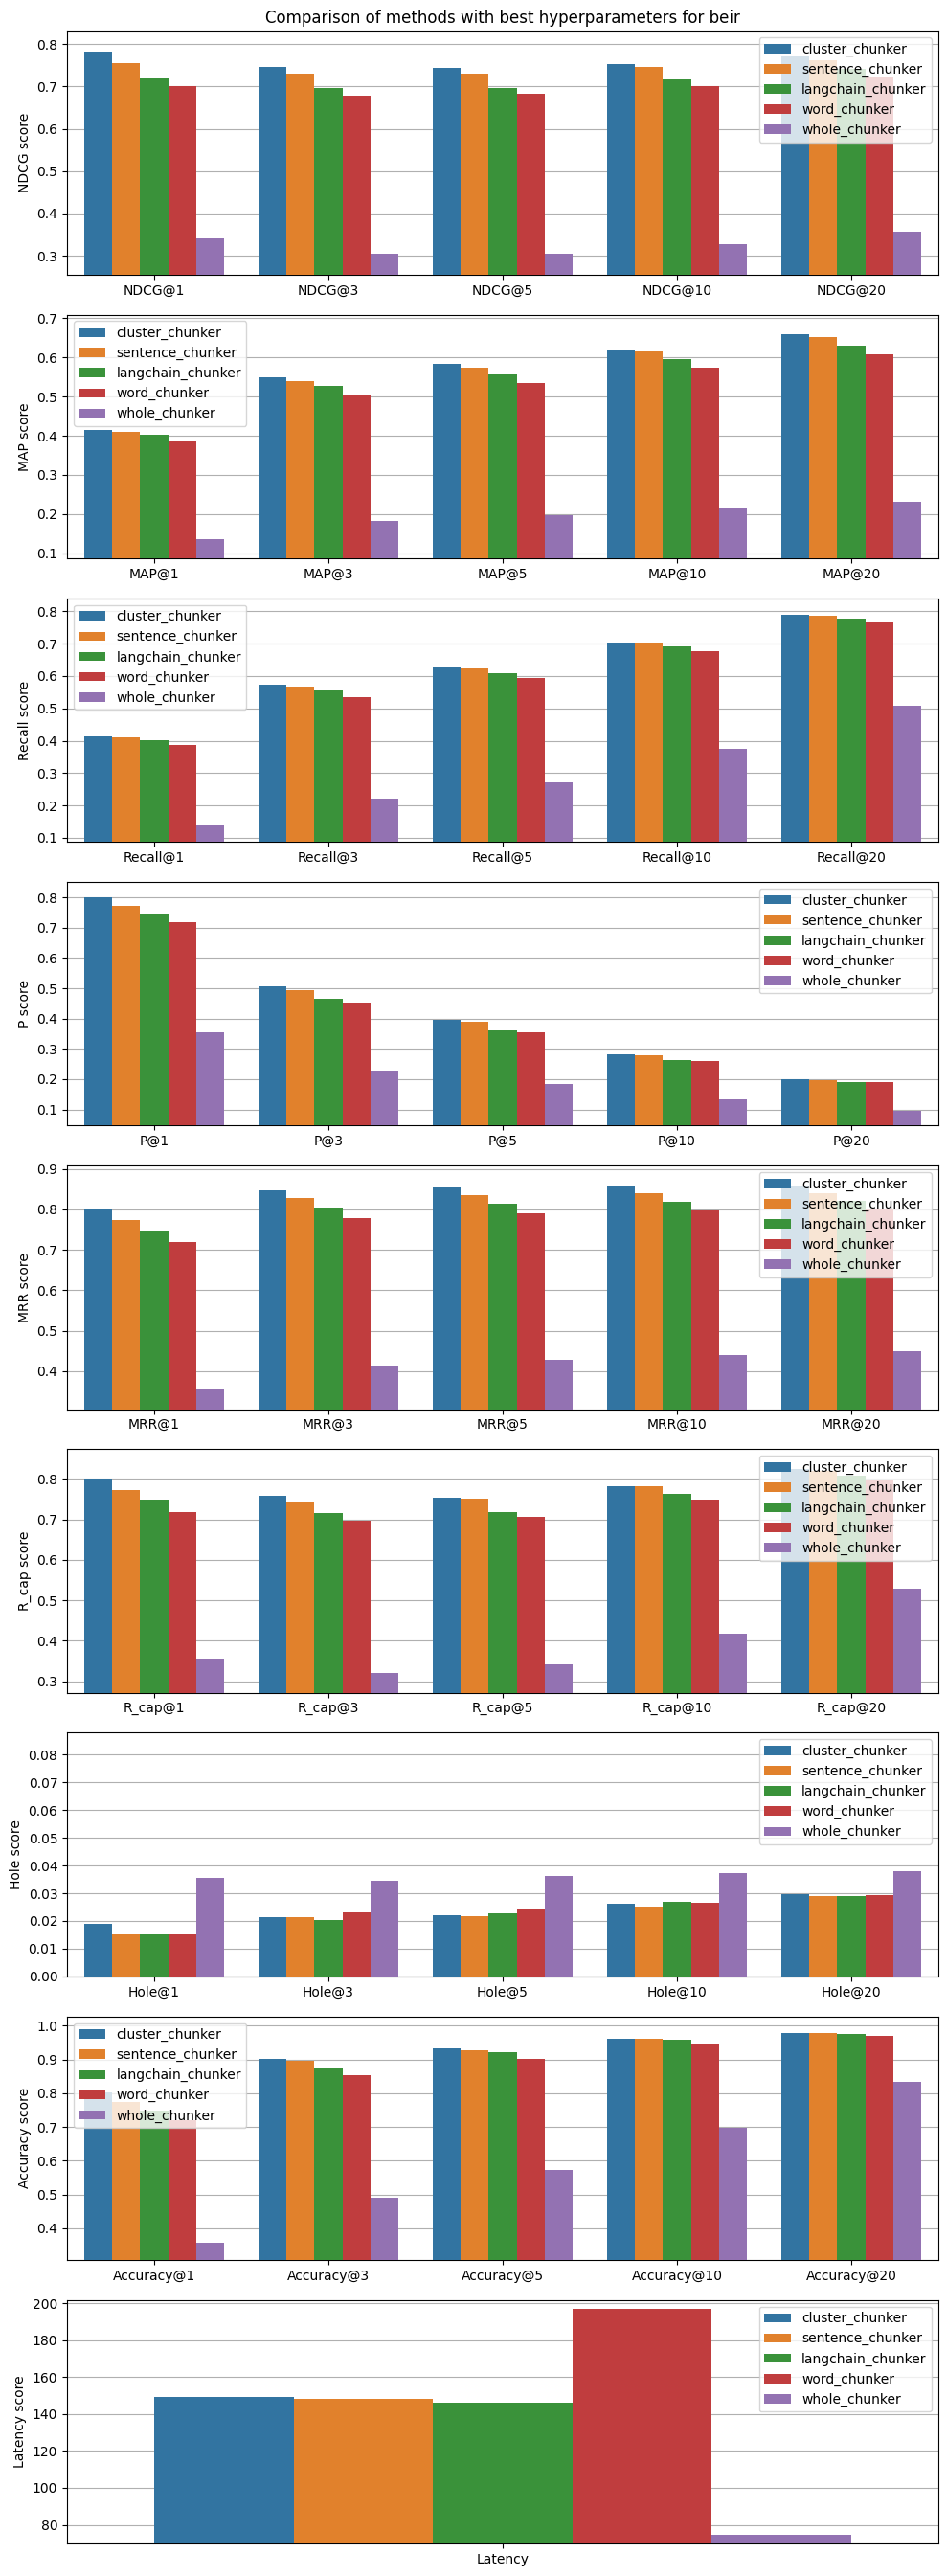

In [3]:
plot_results_for_best_configs_per_method("beir")

### NFCorpus

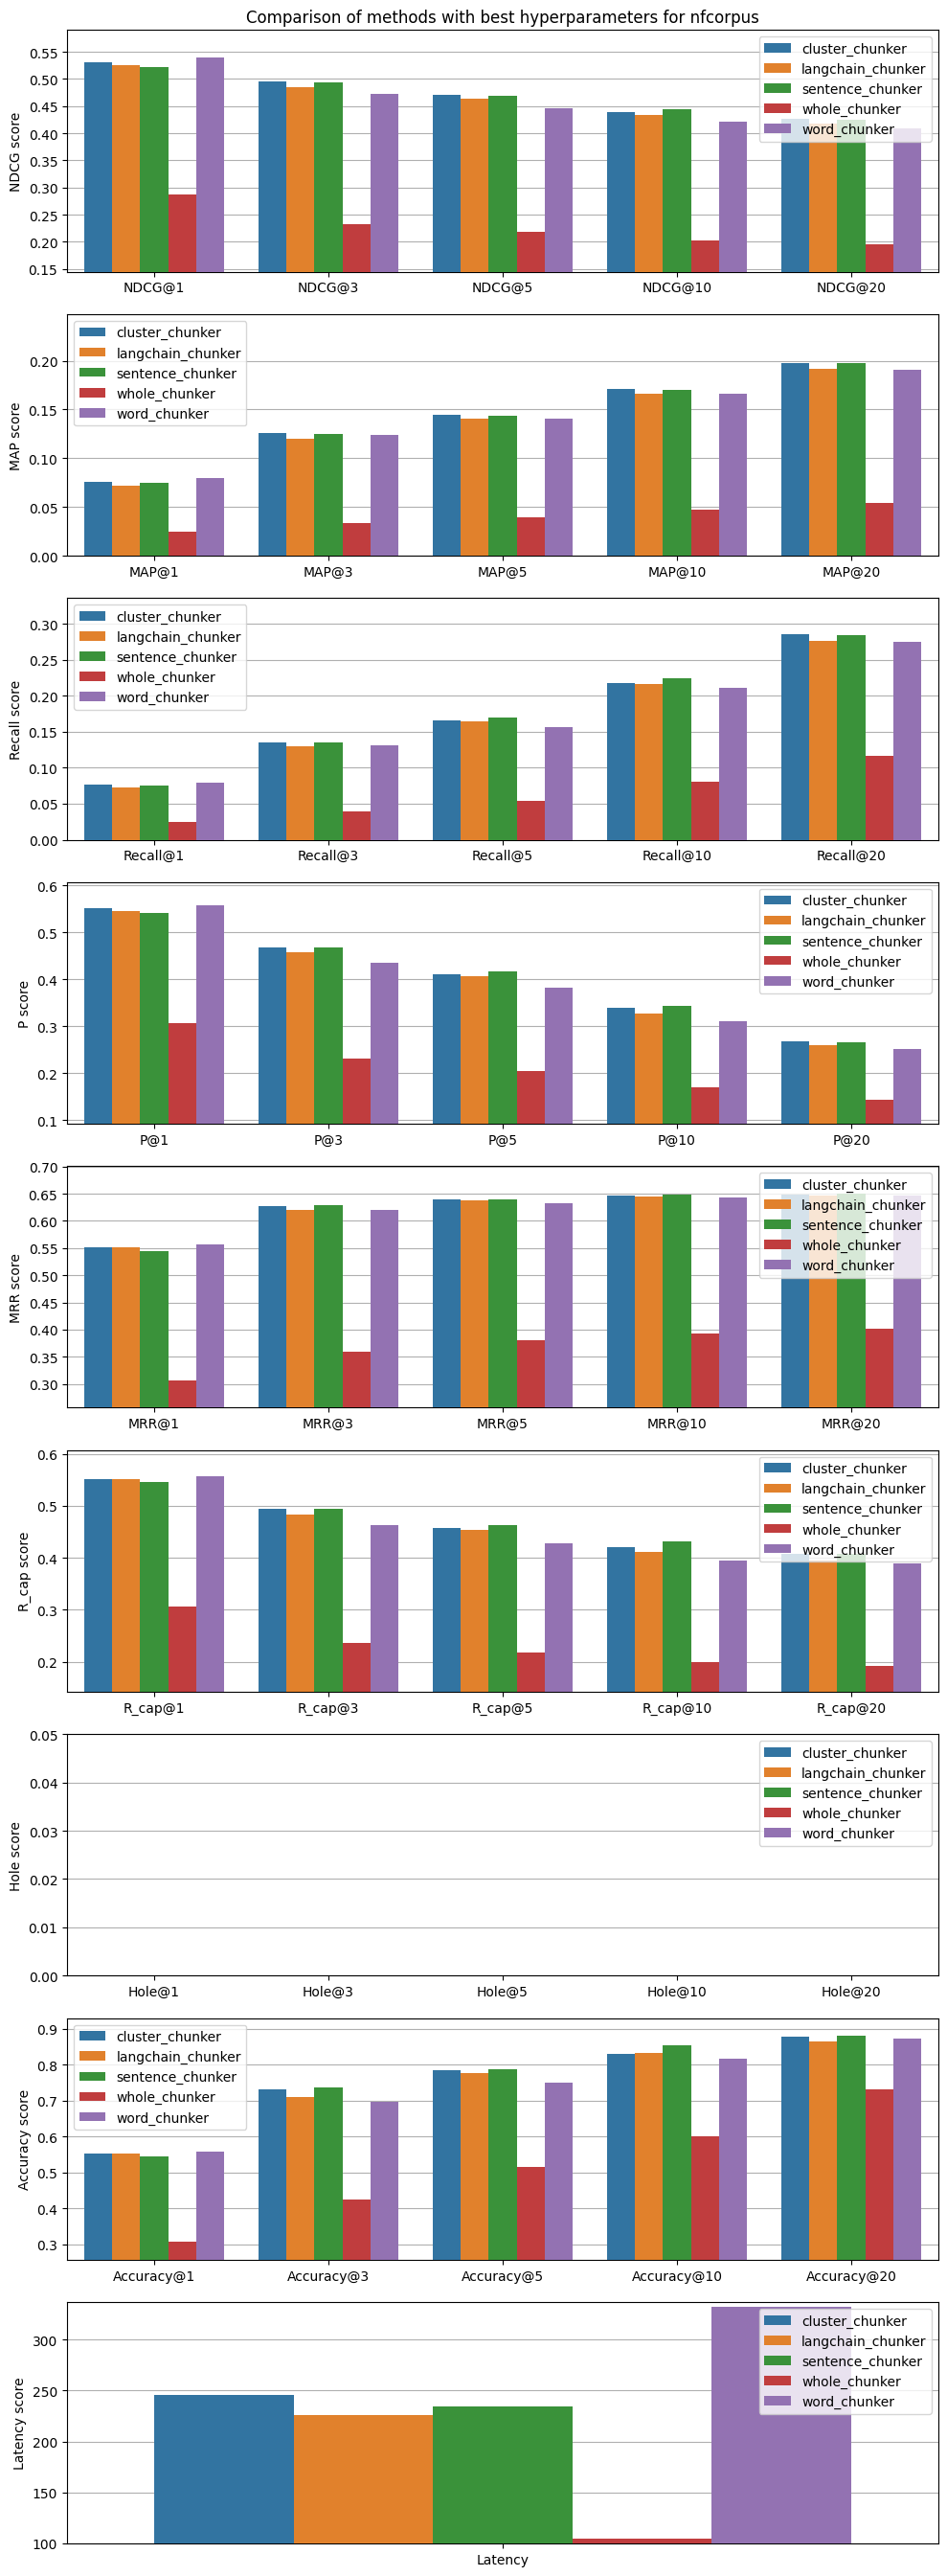

In [4]:
plot_results_for_best_configs_per_method('nfcorpus')

### NQ

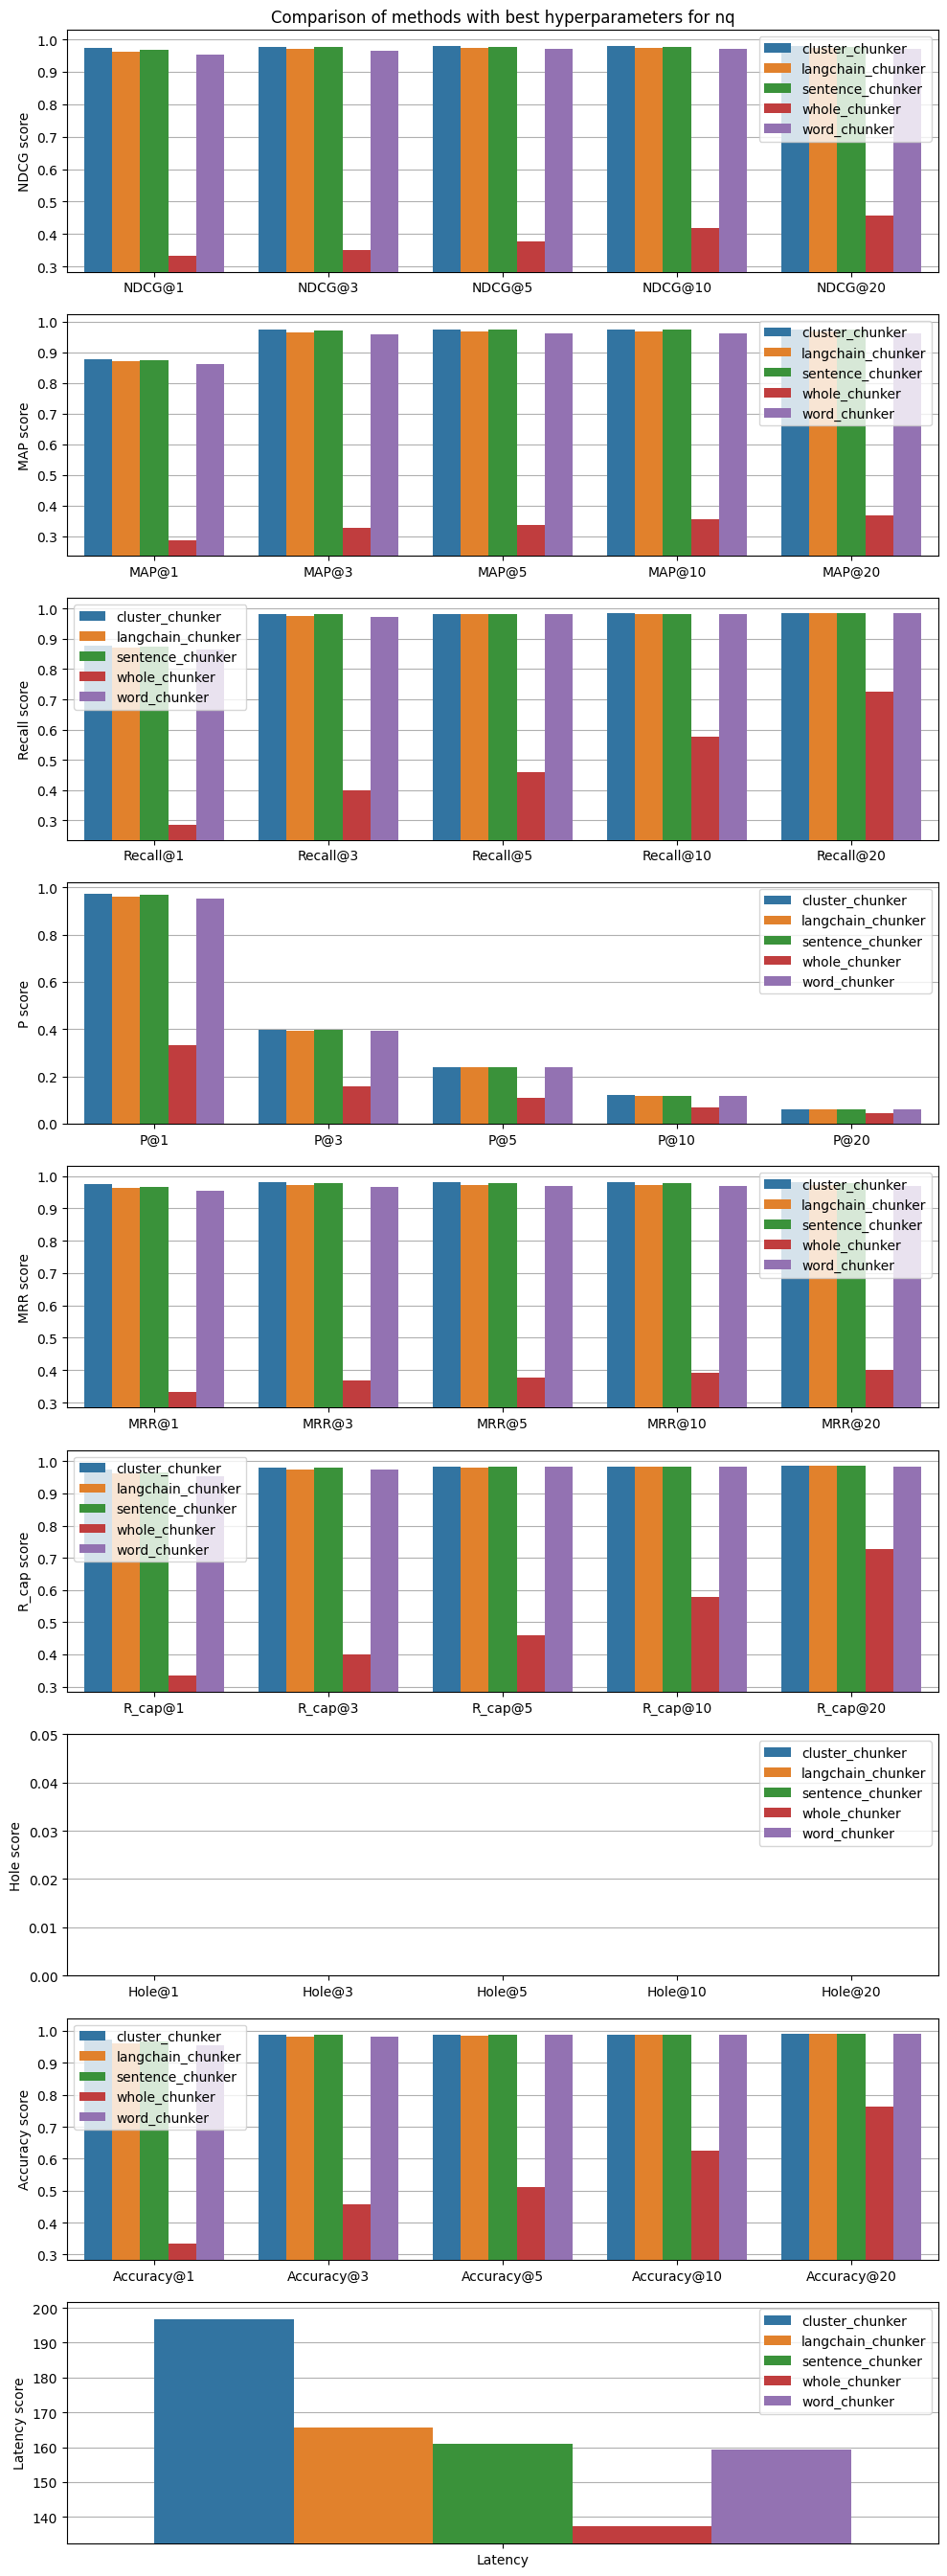

In [5]:
plot_results_for_best_configs_per_method('nq')

### HotpotQA

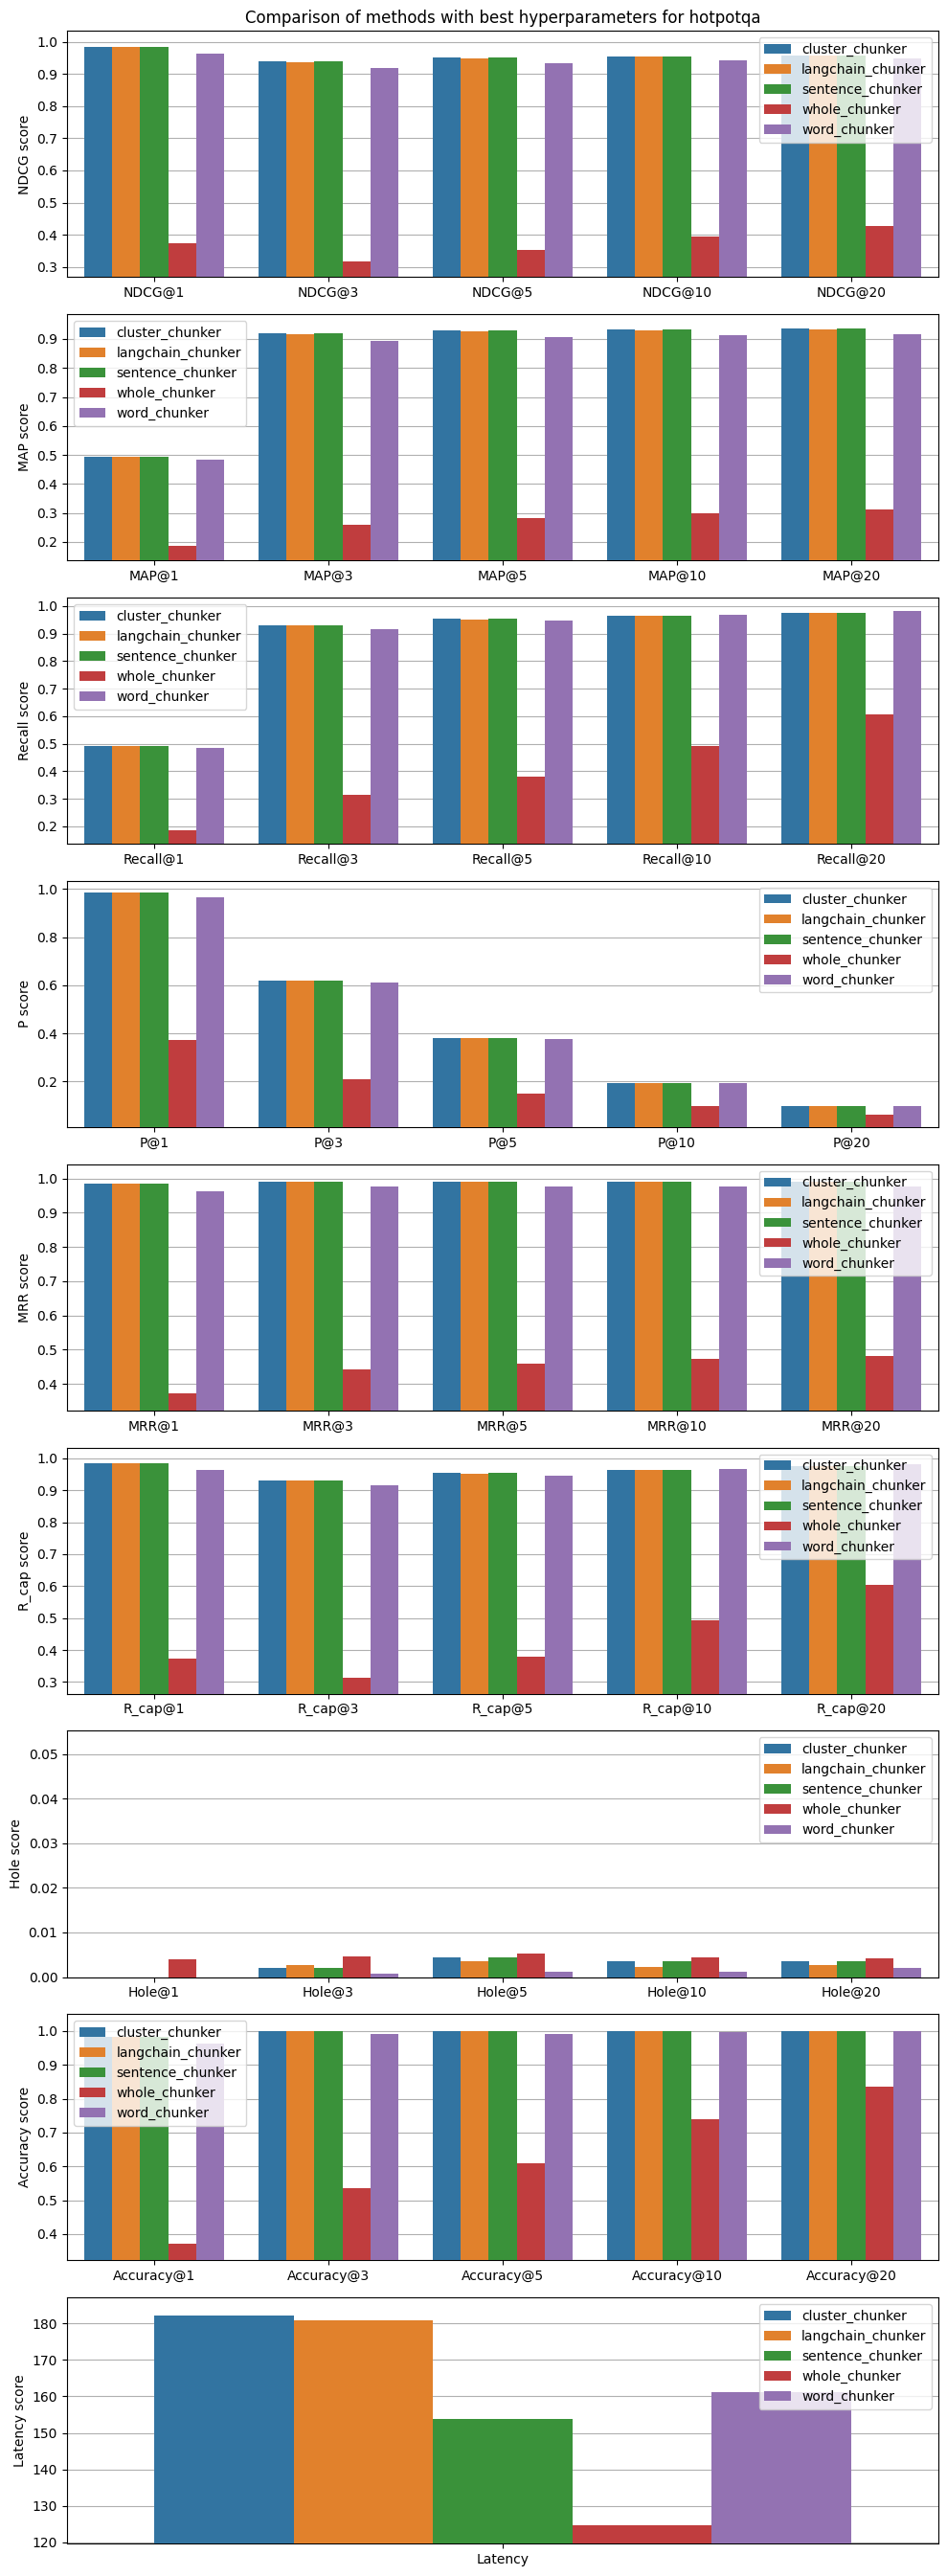

In [6]:
plot_results_for_best_configs_per_method('hotpotqa')

### FiQA

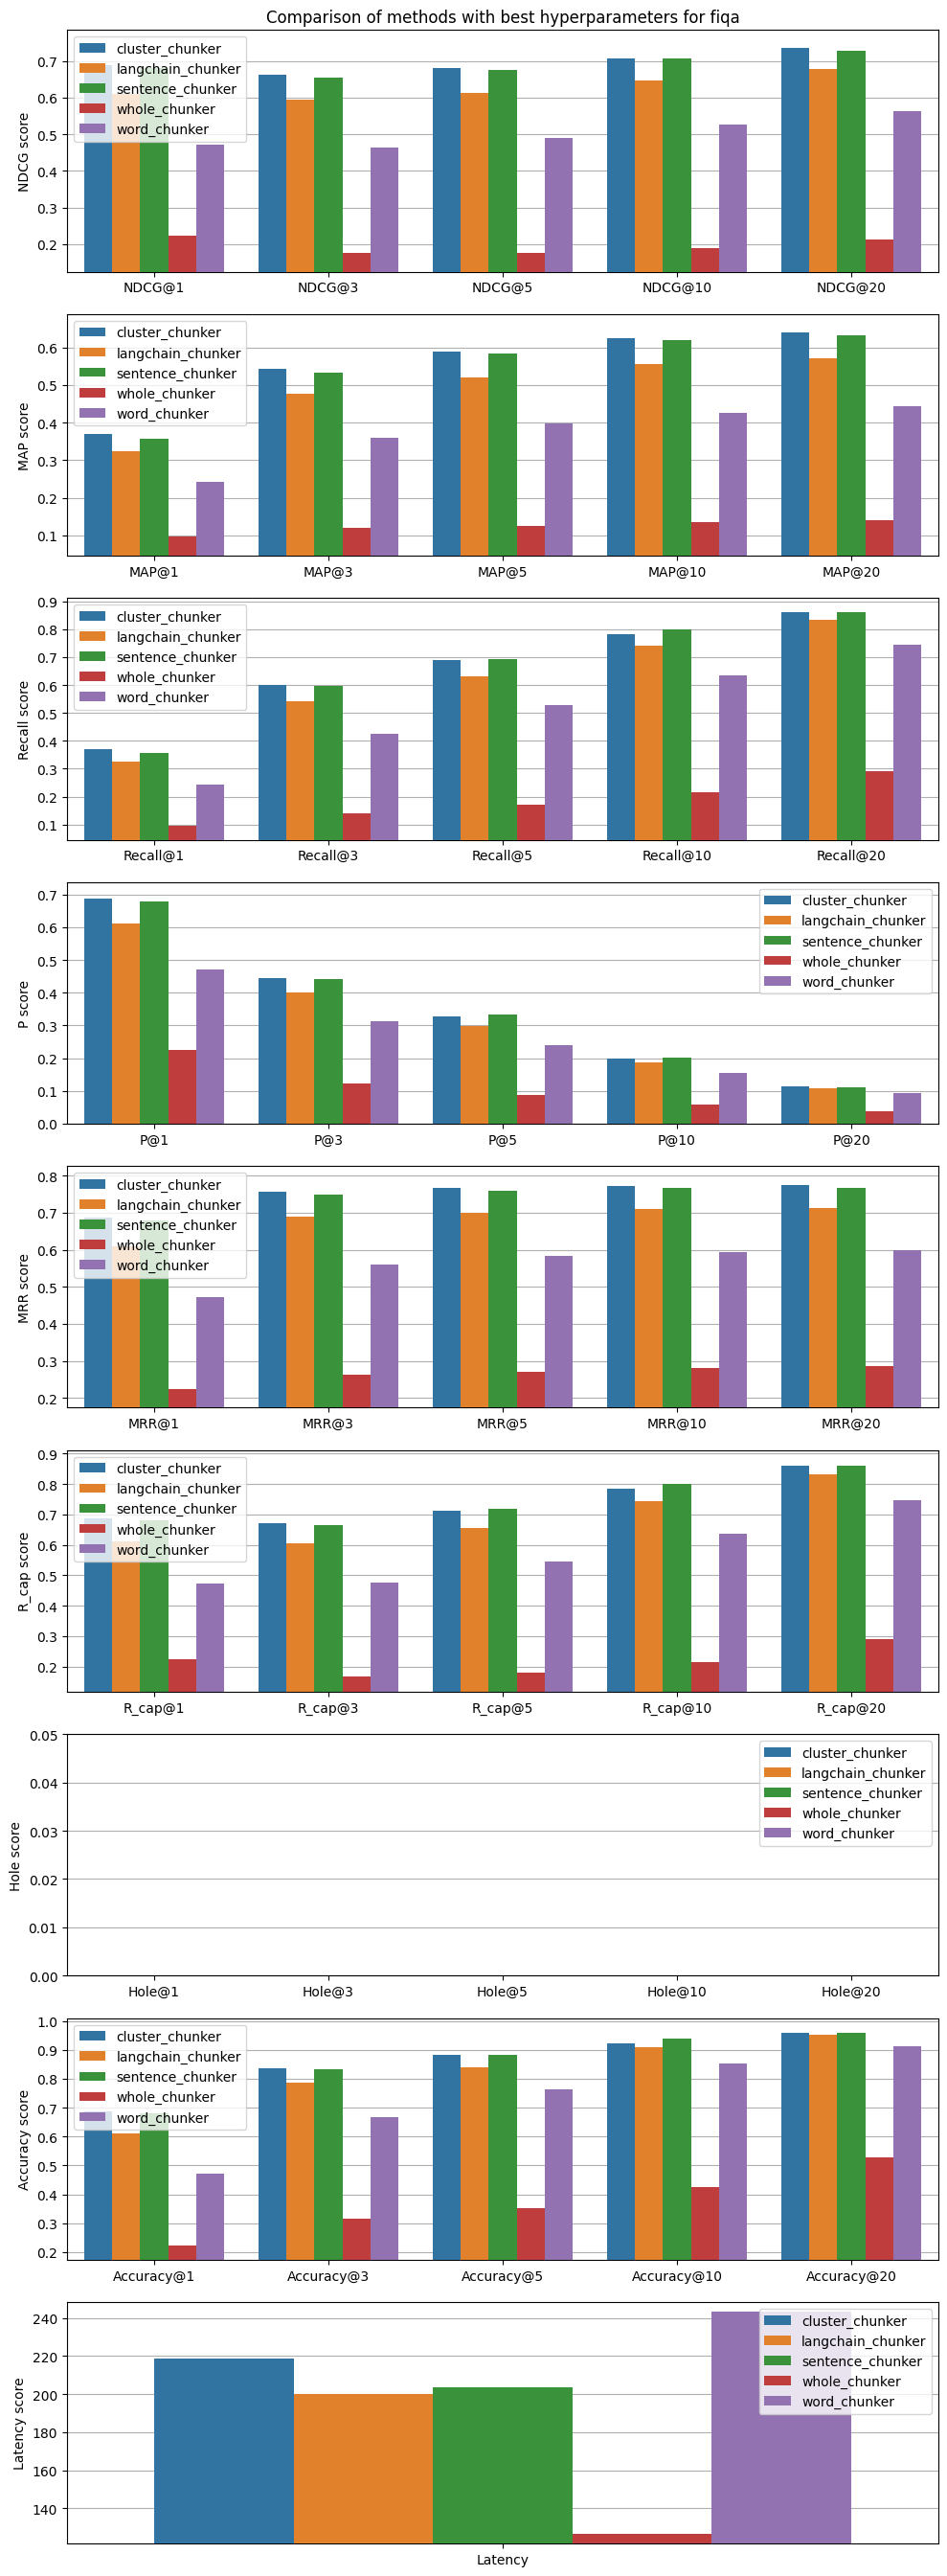

In [7]:
plot_results_for_best_configs_per_method('fiqa')

### Webis-Touche2020

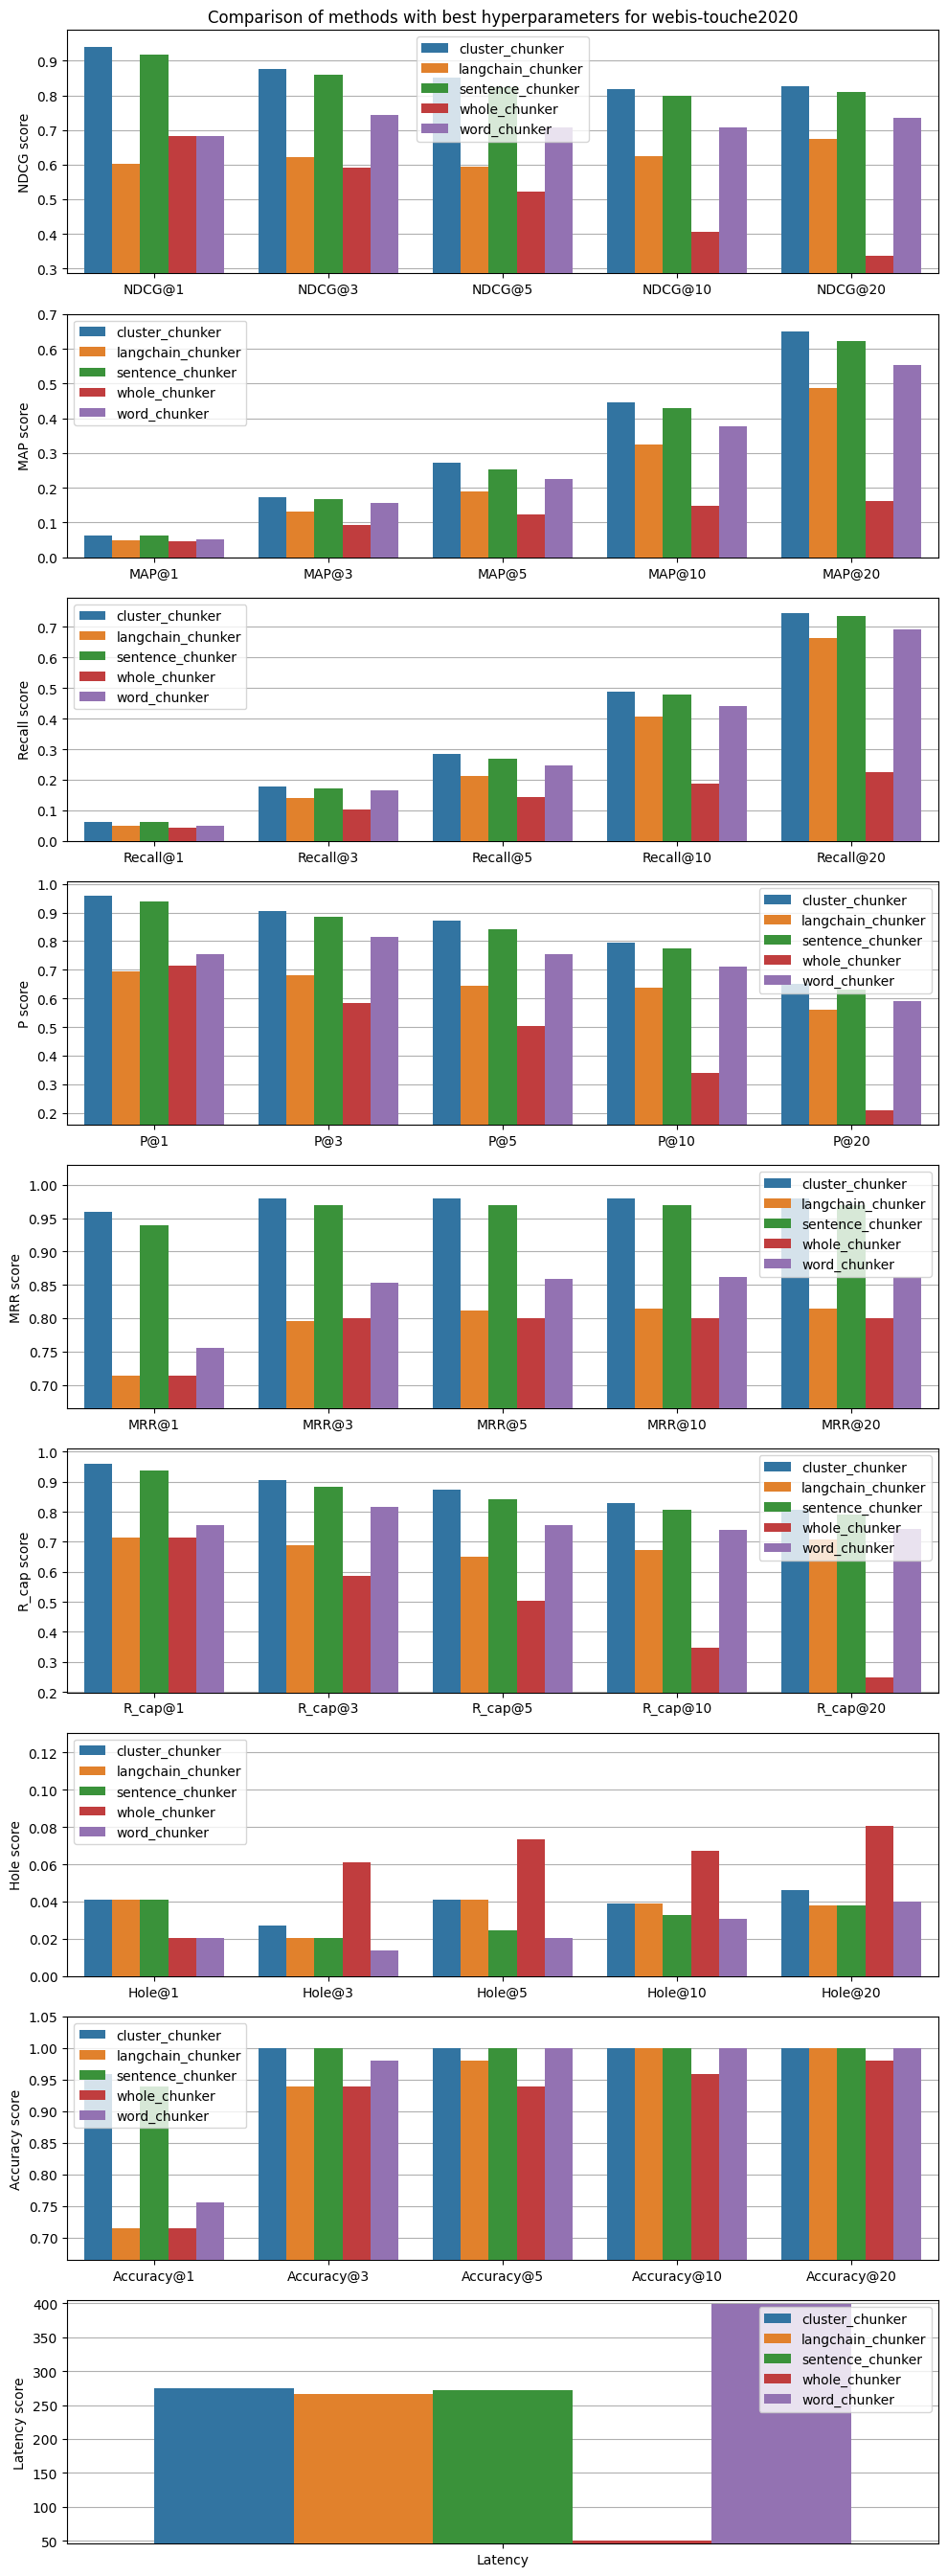

In [8]:
plot_results_for_best_configs_per_method('webis-touche2020')

### DBPedia-Entity

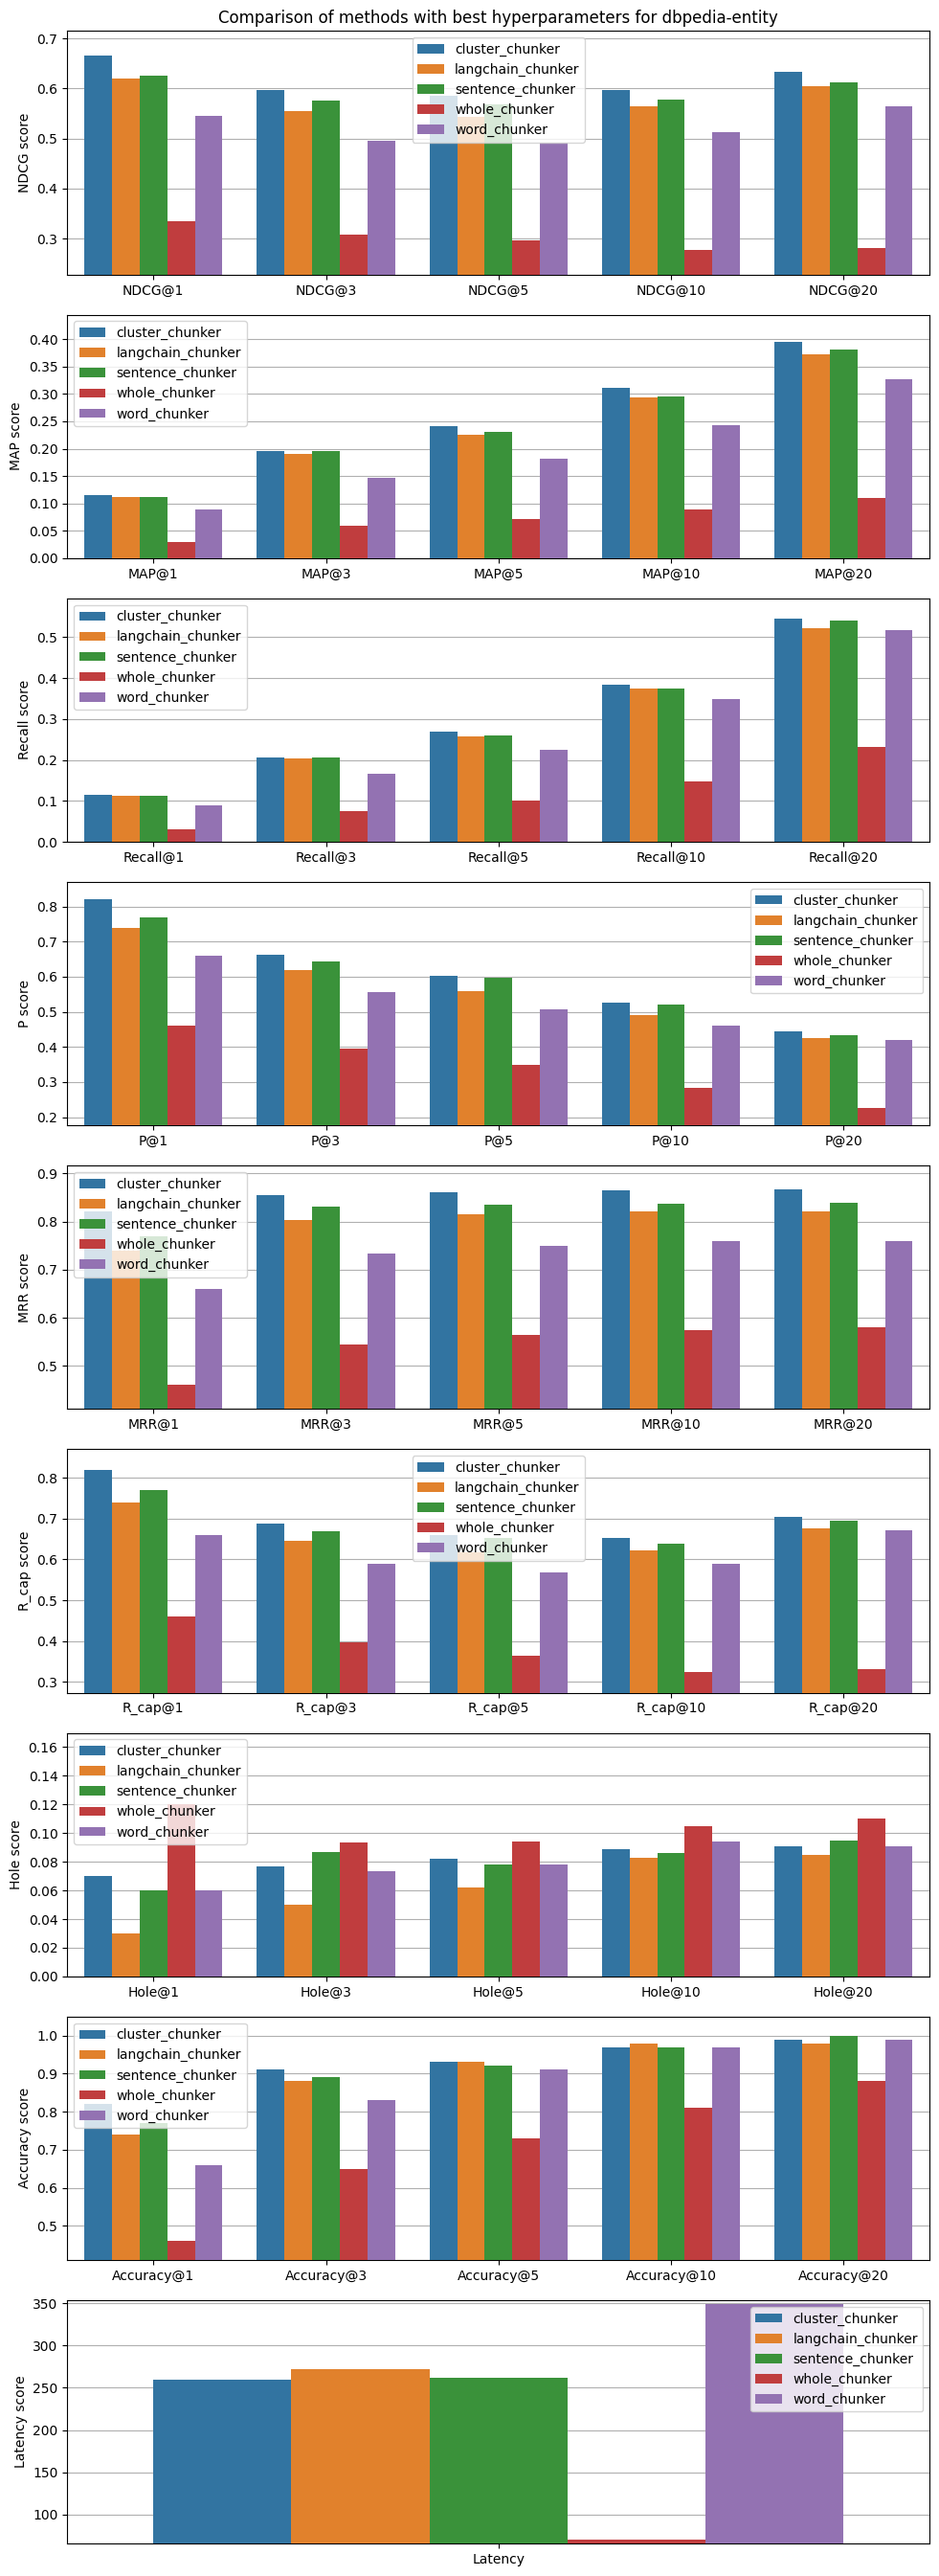

In [9]:
plot_results_for_best_configs_per_method('dbpedia-entity')

### SciDocs

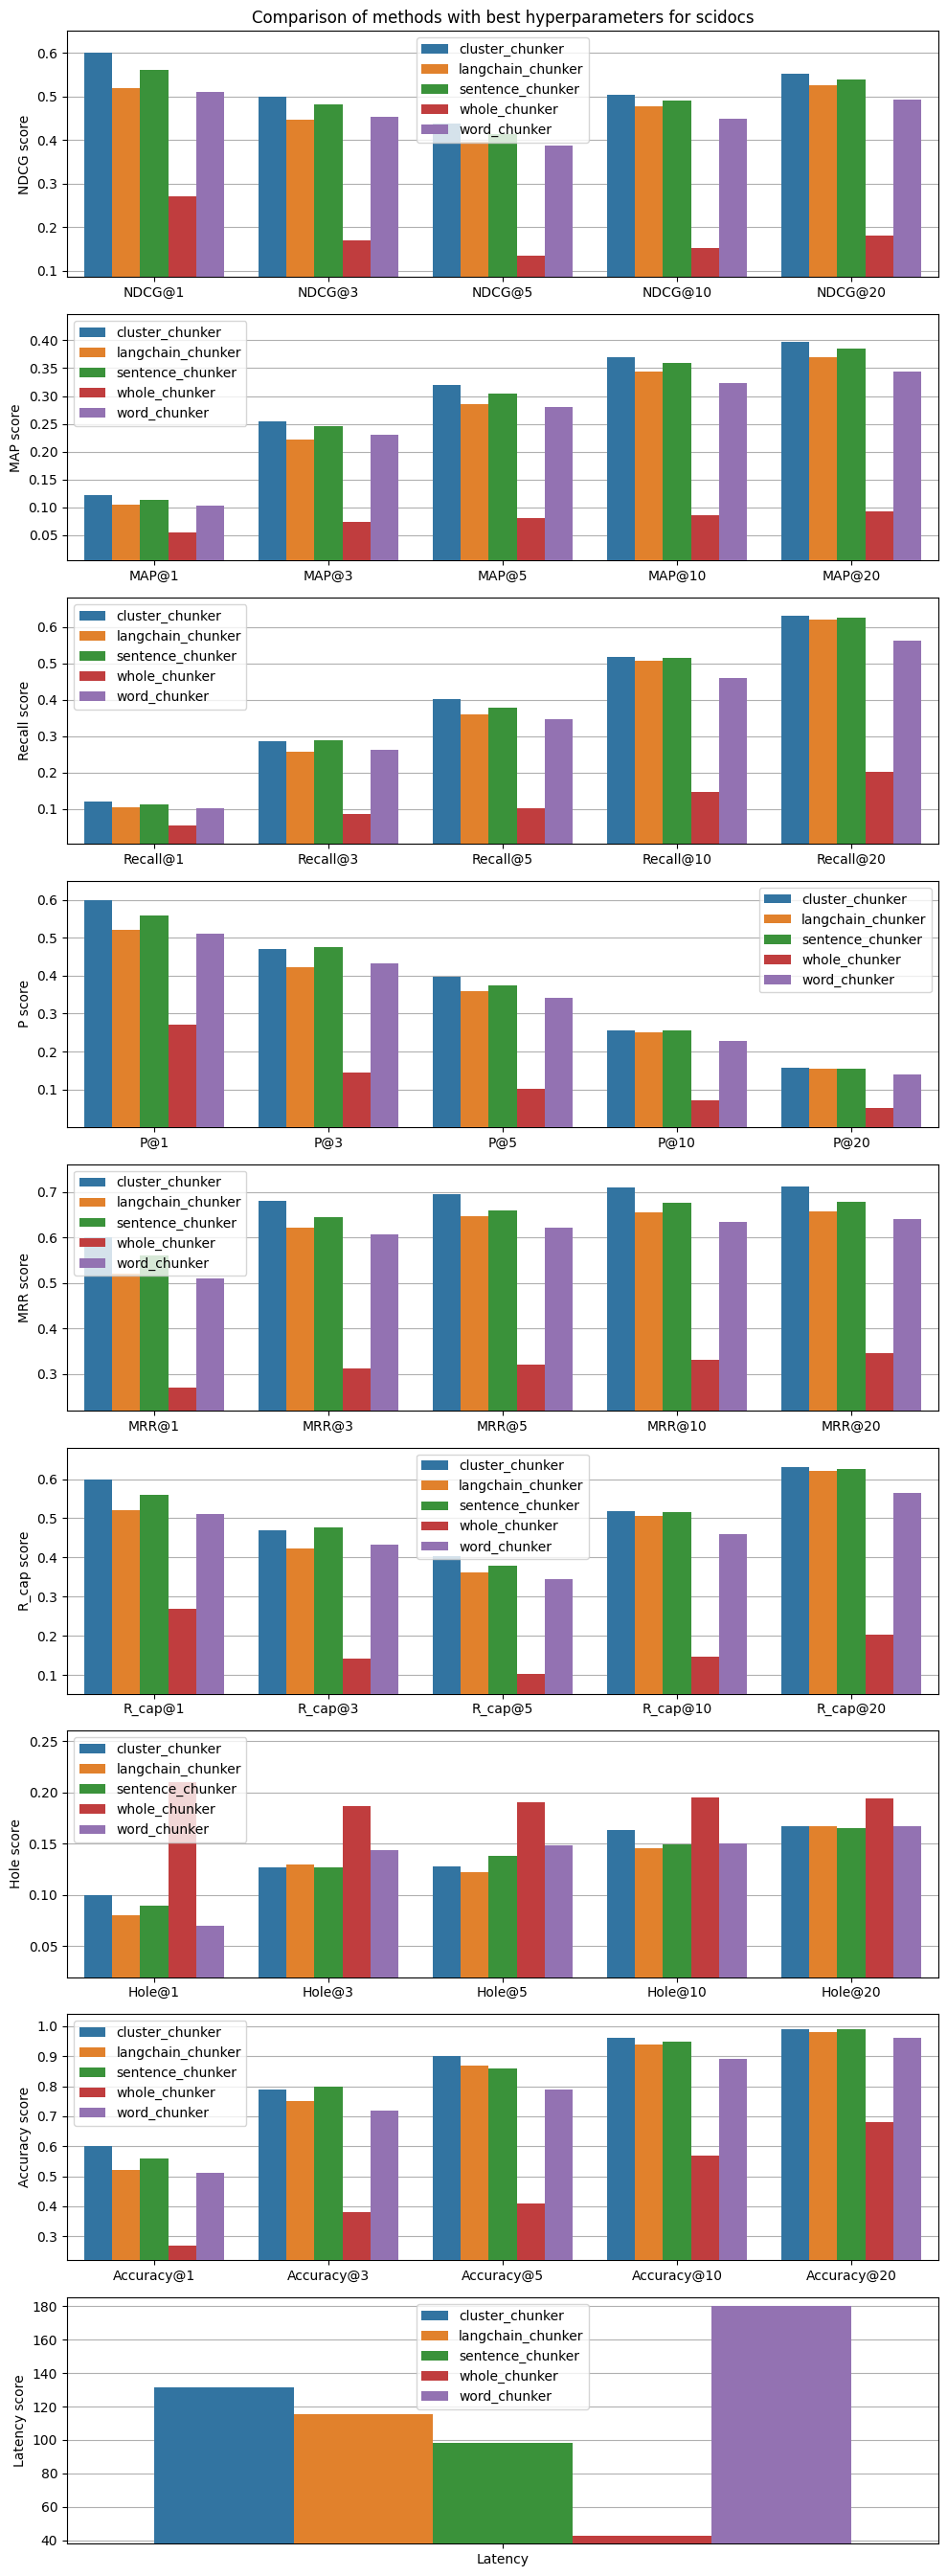

In [10]:
plot_results_for_best_configs_per_method('scidocs')

### FEVER

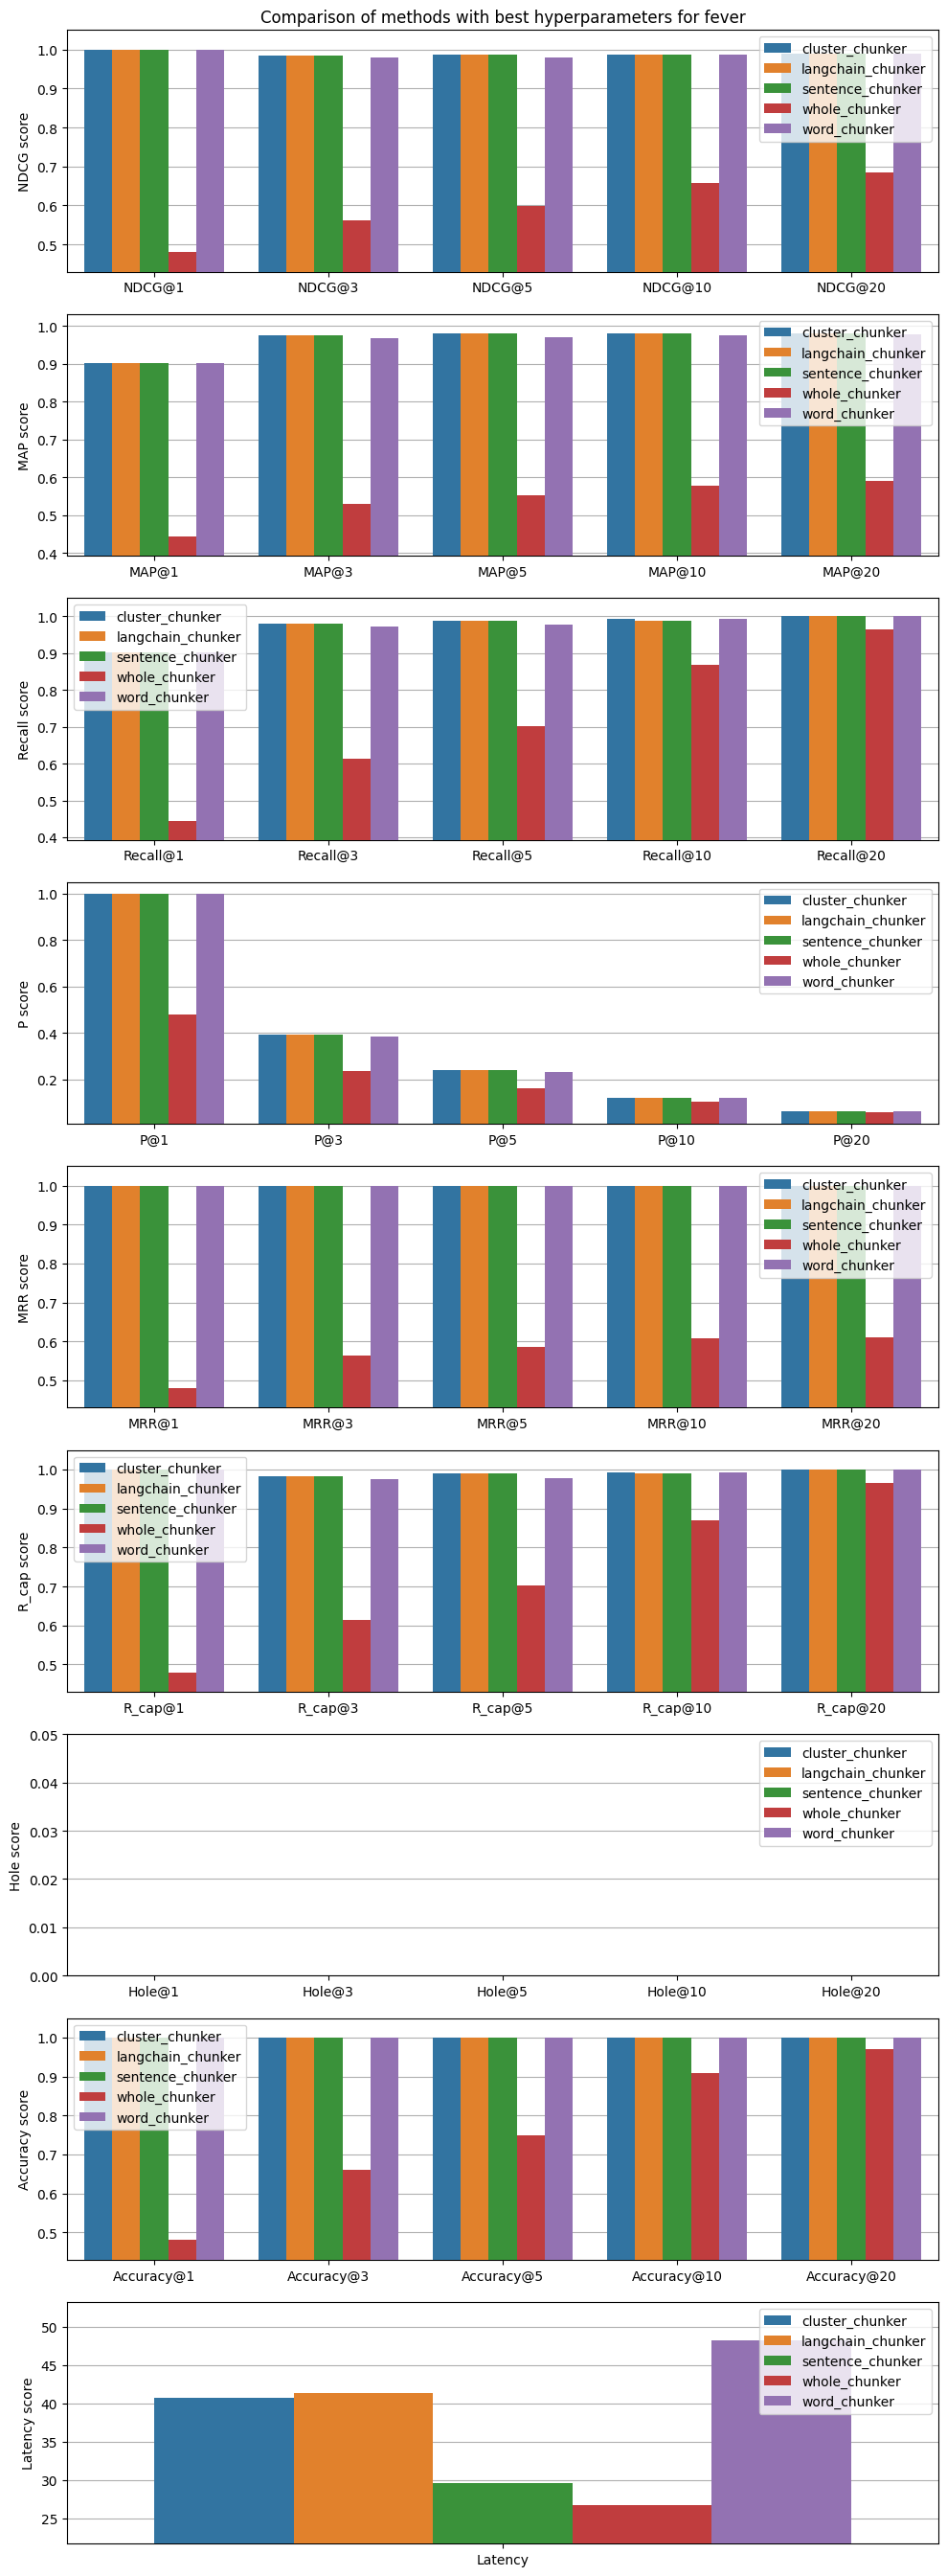

In [11]:
plot_results_for_best_configs_per_method('fever')

### Climate-FEVER

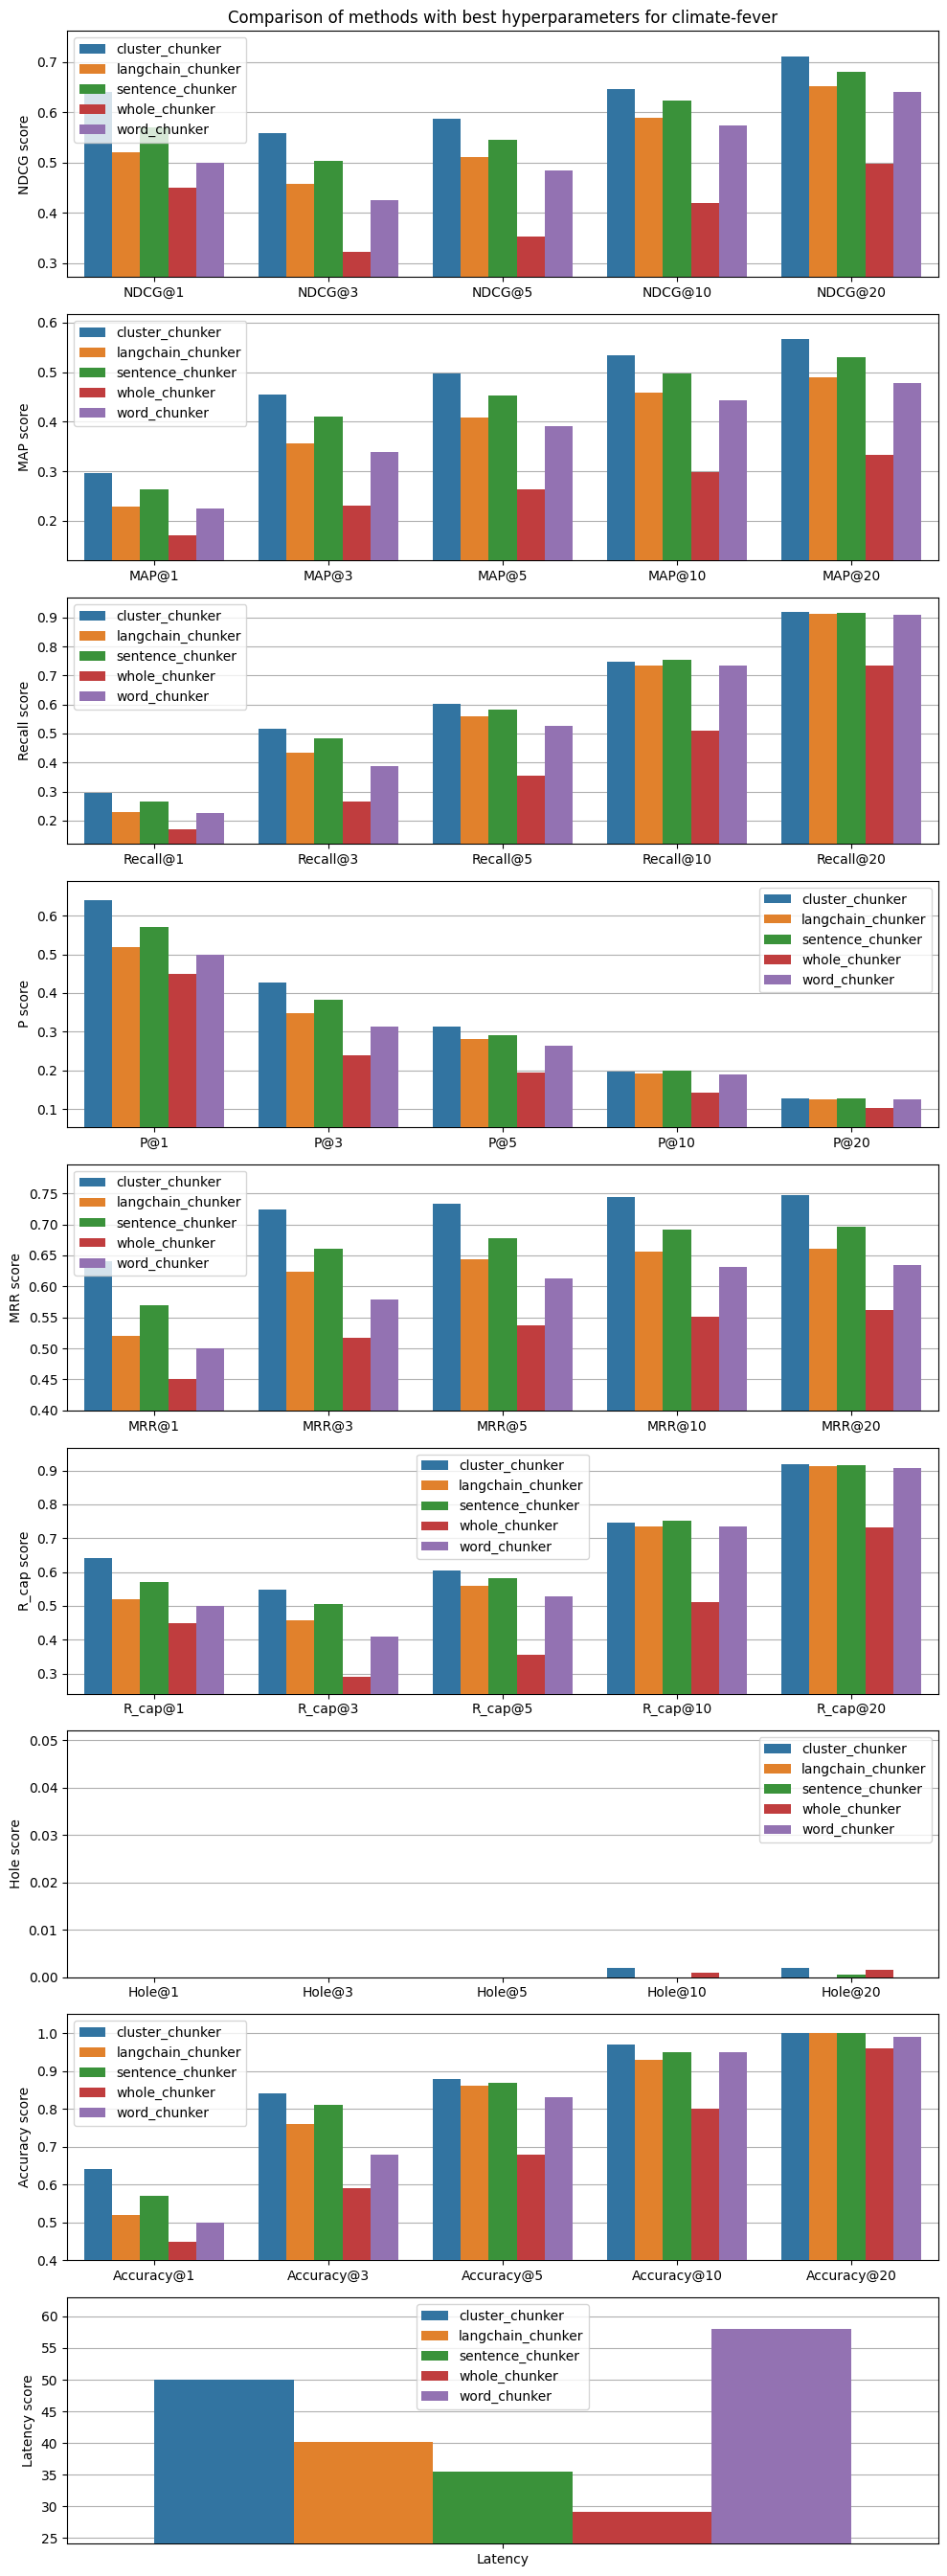

In [12]:
plot_results_for_best_configs_per_method('climate-fever')

### SciFact

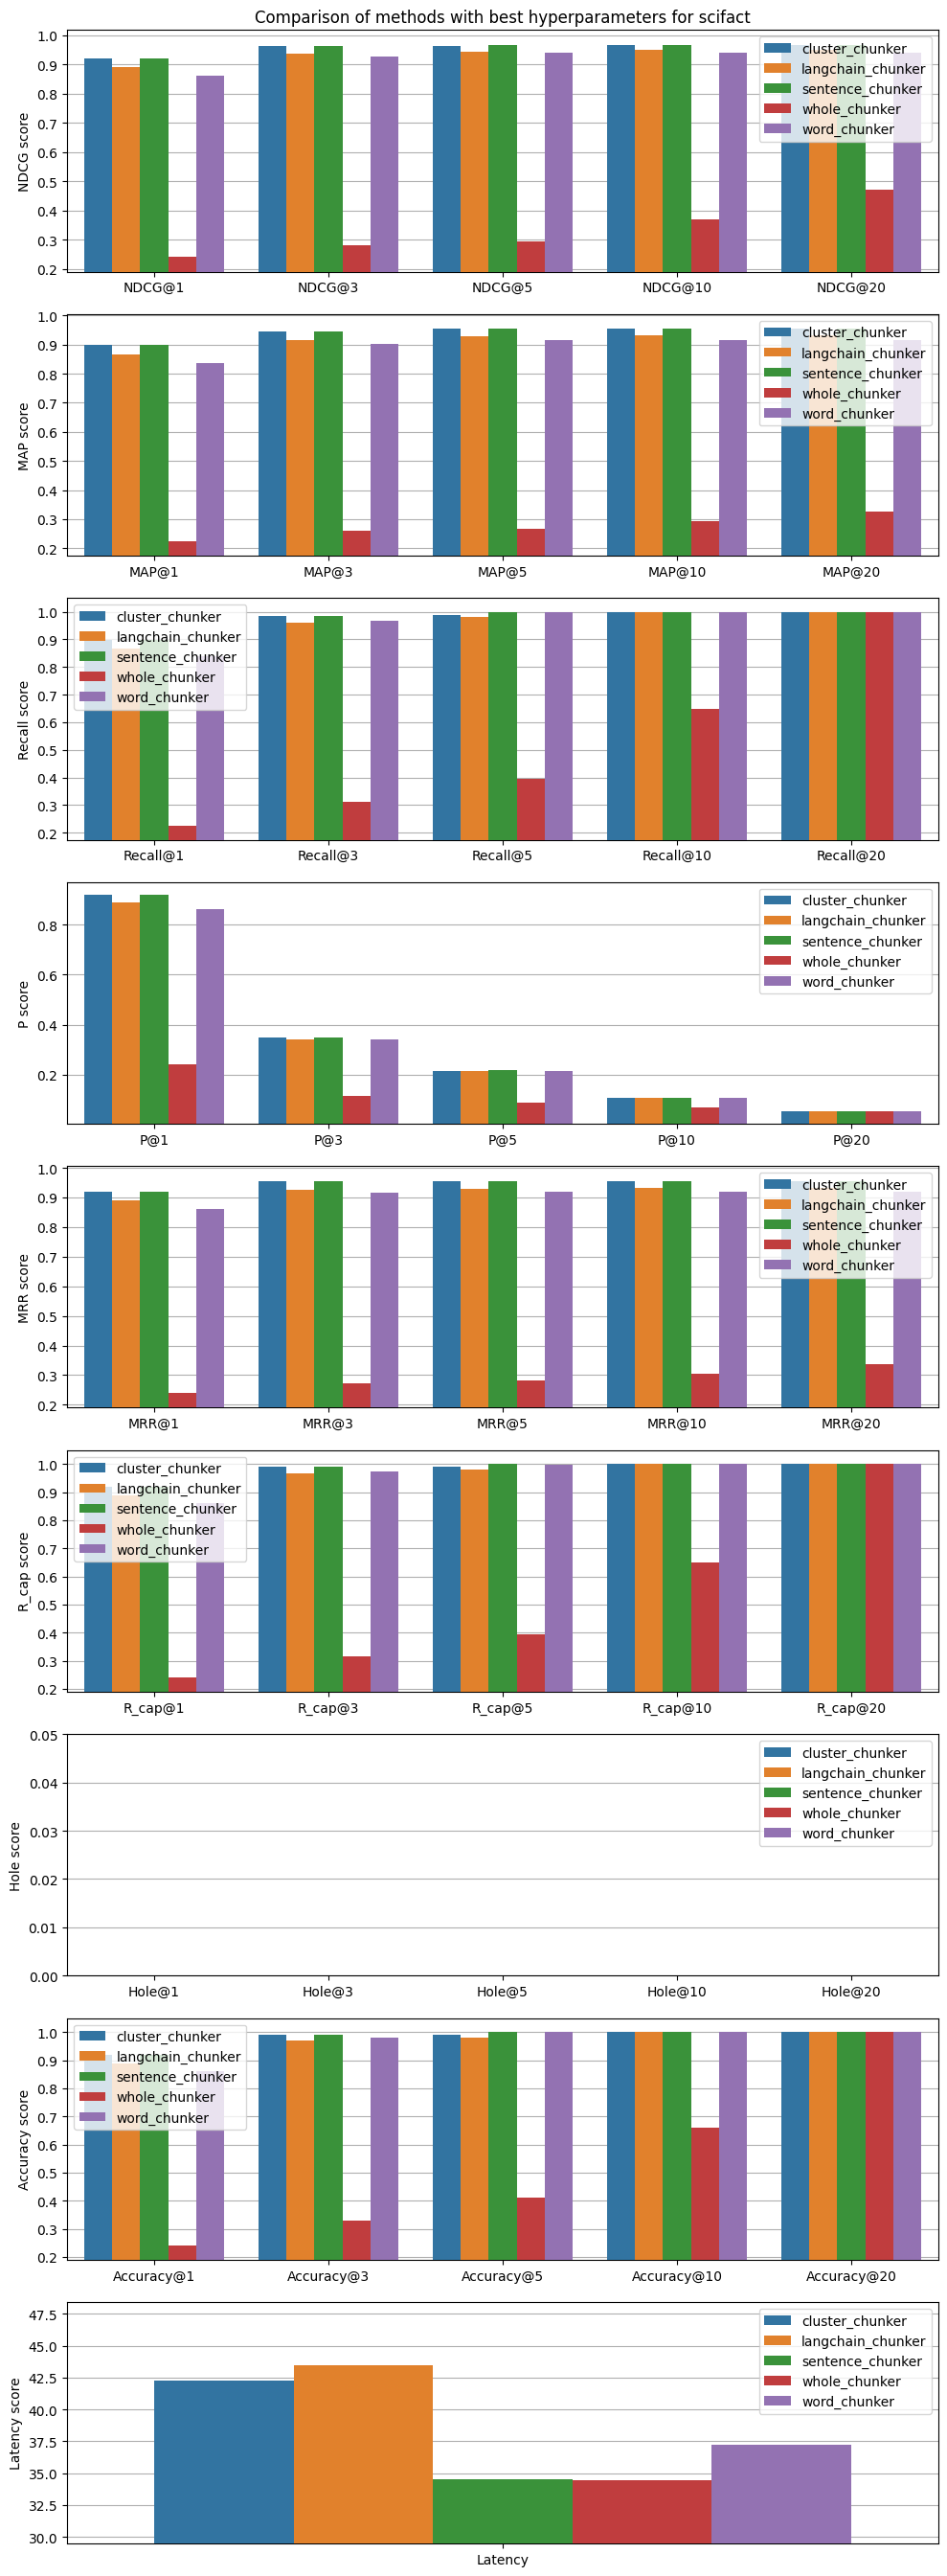

In [13]:
plot_results_for_best_configs_per_method('scifact')

## Long Document Datasets

### MLDR

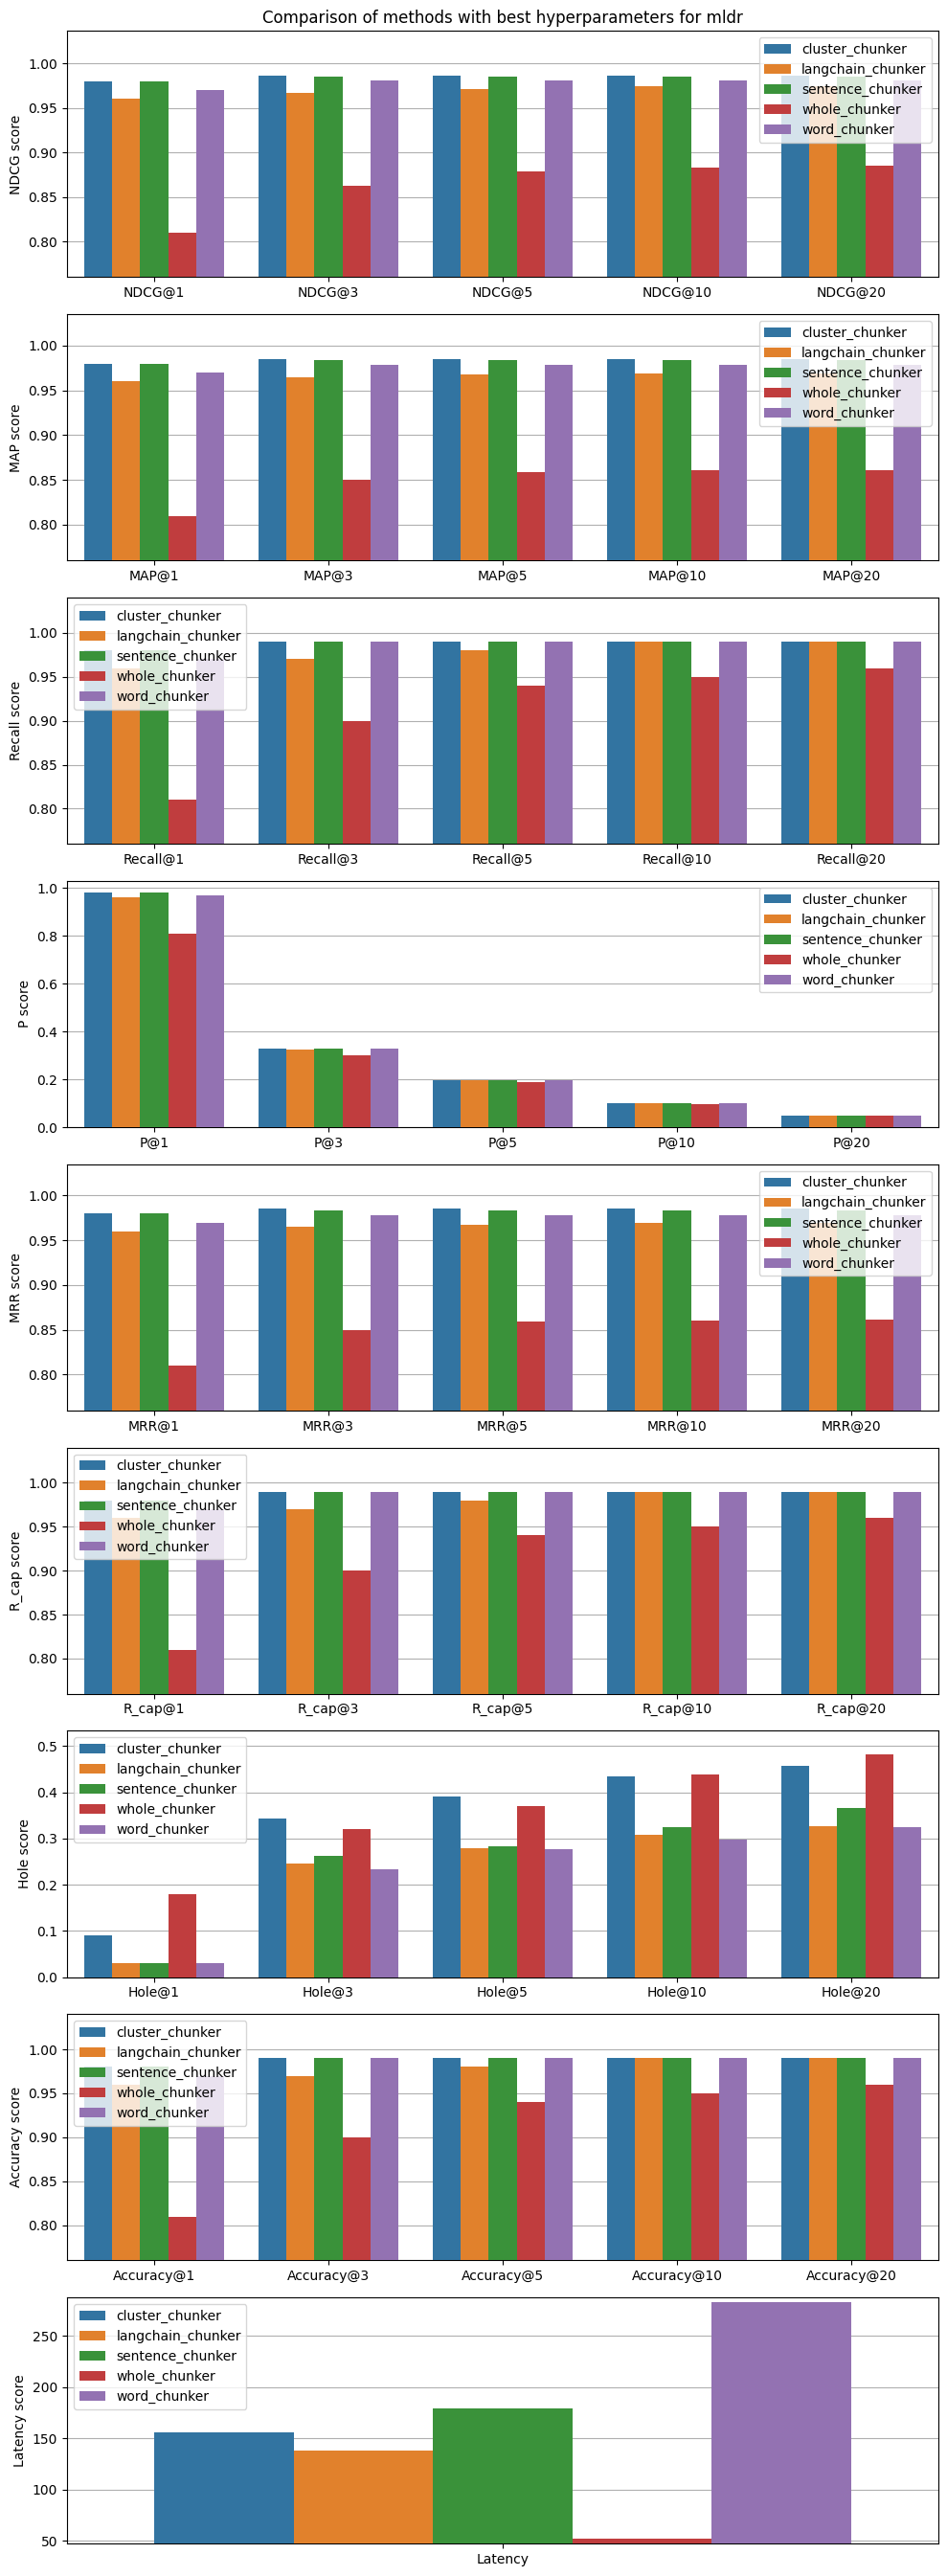

In [14]:
plot_results_for_best_configs_per_method("mldr")

# 2. Hyperparameter Comparison

## BEIR

In [ ]:
df = get_average_results(beir_datasets)

### Cluster Chunker

#### Lambda

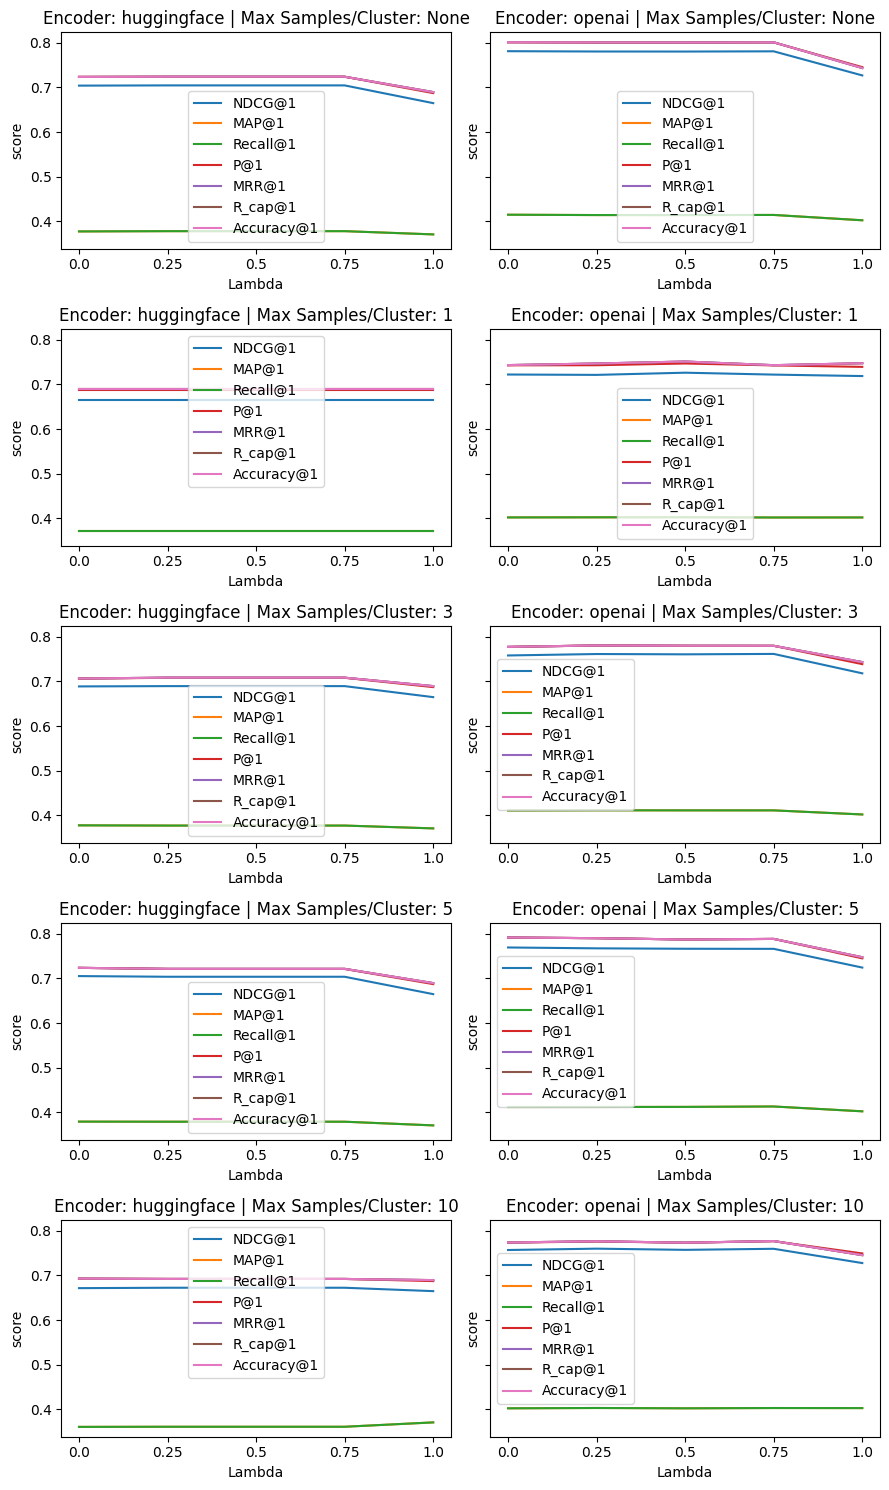

In [16]:
fig, axes = plt.subplots(len(cfg['cluster_chunker_max_samples_per_cluster']), len(cfg['encoders']), figsize=(9, 15), sharey=True)
df_sub = get_hyperparam_comparison(df, 'cluster_chunker')
for i, max_samples_per_chunker in enumerate(cfg['cluster_chunker_max_samples_per_cluster']):
    for j, encoder in enumerate(cfg['encoders']):
        if max_samples_per_chunker is None:
            df_slice = df_sub[(df_sub['max_samples_per_cluster'].isnull()) & (df_sub['encoder']==encoder)].sort_values('lamda', ascending=True)
        else:
            df_slice = df_sub[(df_sub['max_samples_per_cluster']==max_samples_per_chunker) & (df_sub['encoder']==encoder)].sort_values('lamda', ascending=True)
        xticks = range(len(df_slice['lamda']))
        for metric in plot_metrics:
            if metric in {'Latency','Hole@k'}: continue
            metric1 = metric.split('@')[0]+'@1'
            axes[i, j].plot(xticks, df_slice[metric1], label=metric1)
        axes[i, j].set_title(f'Encoder: {encoder} | Max Samples/Cluster: {max_samples_per_chunker}')
        axes[i, j].set_xlabel('Lambda')
        axes[i, j].set_xticks(xticks)
        axes[i, j].set_xticklabels(df_slice['lamda'])
        axes[i, j].set_ylabel('score')
        axes[i, j].legend()
fig.tight_layout()
plt.show()

#### Max samples/cluster

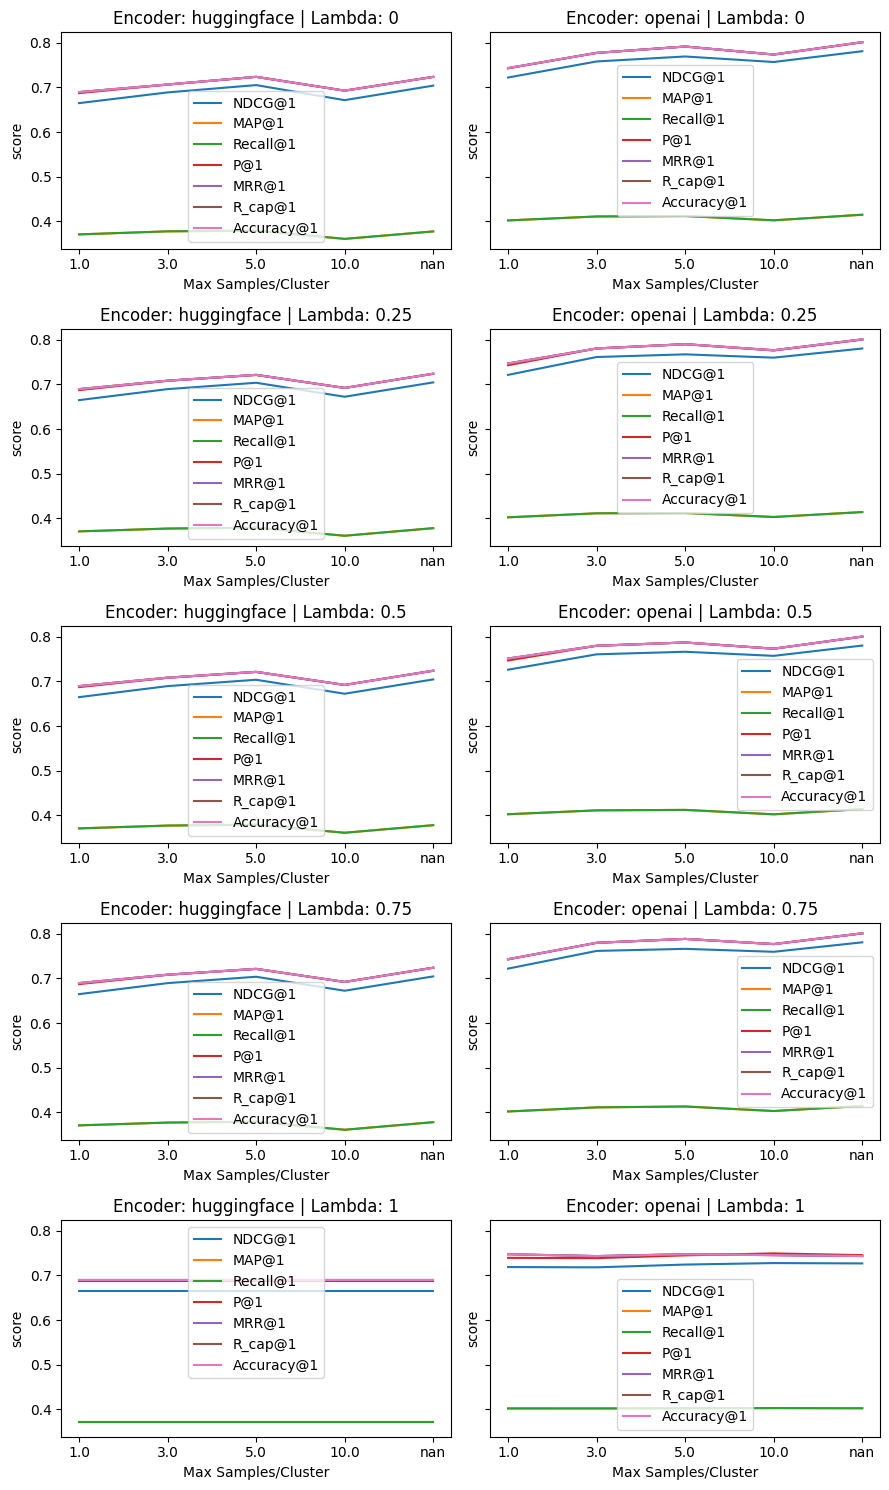

In [17]:
fig, axes = plt.subplots(len(cfg['cluster_chunker_lamda']), len(cfg['encoders']), figsize=(9, 15), sharey=True)
df_sub = get_hyperparam_comparison(df, 'cluster_chunker')
for i, lamda in enumerate(cfg['cluster_chunker_lamda']):
    for j, encoder in enumerate(cfg['encoders']):
        df_slice = df_sub[(df_sub['lamda']==lamda) & (df_sub['encoder']==encoder)].sort_values('max_samples_per_cluster', ascending=True)
        xticks = range(len(df_slice['max_samples_per_cluster']))
        for metric in plot_metrics:
            if metric in {'Latency','Hole@k'}: continue
            metric1 = metric.split('@')[0]+'@1'
            axes[i, j].plot(xticks, df_slice[metric1], label=metric1)
        axes[i, j].set_title(f'Encoder: {encoder} | Lambda: {lamda}')
        axes[i, j].set_xlabel('Max Samples/Cluster')
        axes[i, j].set_xticks(xticks)
        axes[i, j].set_xticklabels(df_slice['max_samples_per_cluster'])
        axes[i, j].set_ylabel('score')
        axes[i, j].legend()
fig.tight_layout()
plt.show()

### Langchain Chunker

#### Breakpoint threshold

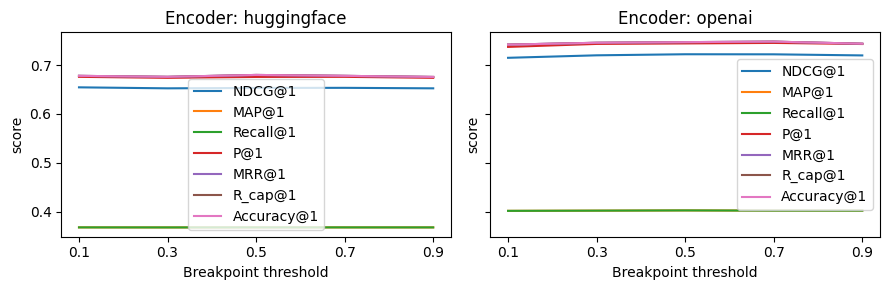

In [18]:
fig, axes = plt.subplots(1, len(cfg['encoders']), figsize=(9, 3), sharey=True)
df_sub = get_hyperparam_comparison(df, 'langchain_chunker')
for j, encoder in enumerate(cfg['encoders']):
    df_slice = df_sub[df_sub['encoder']==encoder].sort_values('breakpoint_threshold_amount', ascending=True)
    xticks = range(len(df_slice['breakpoint_threshold_amount']))
    for metric in plot_metrics:
        if metric in {'Latency','Hole@k'}: continue
        metric1 = metric.split('@')[0]+'@1'
        axes[j].plot(xticks, df_slice[metric1], label=metric1)
    axes[j].set_title(f'Encoder: {encoder}')
    axes[j].set_xlabel('Breakpoint threshold')
    axes[j].set_xticks(xticks)
    axes[j].set_xticklabels(df_slice['breakpoint_threshold_amount'])
    axes[j].set_ylabel('score')
    axes[j].legend()
fig.tight_layout()
plt.show()

### Sentence Chunker

#### k

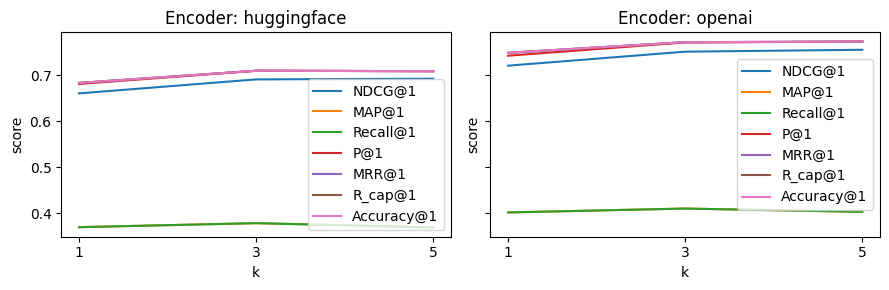

In [19]:
fig, axes = plt.subplots(1, len(cfg['encoders']), figsize=(9, 3), sharey=True)
df_sub = get_hyperparam_comparison(df, 'sentence_chunker')
for j, encoder in enumerate(cfg['encoders']):
    df_slice = df_sub[df_sub['encoder']==encoder].sort_values('sentence_chunker_k', ascending=True)
    xticks = range(len(df_slice['sentence_chunker_k']))
    for metric in plot_metrics:
        if metric in {'Latency','Hole@k'}: continue
        metric1 = metric.split('@')[0]+'@1'
        axes[j].plot(xticks, df_slice[metric1], label=metric1)
    axes[j].set_title(f'Encoder: {encoder}')
    axes[j].set_xlabel('k')
    axes[j].set_xticks(xticks)
    axes[j].set_xticklabels(df_slice['sentence_chunker_k'])
    axes[j].set_ylabel('score')
    axes[j].legend()
fig.tight_layout()
plt.show()

## MLDR

In [20]:
df = get_results_df('mldr')

### Cluster Chunker

#### Lambda

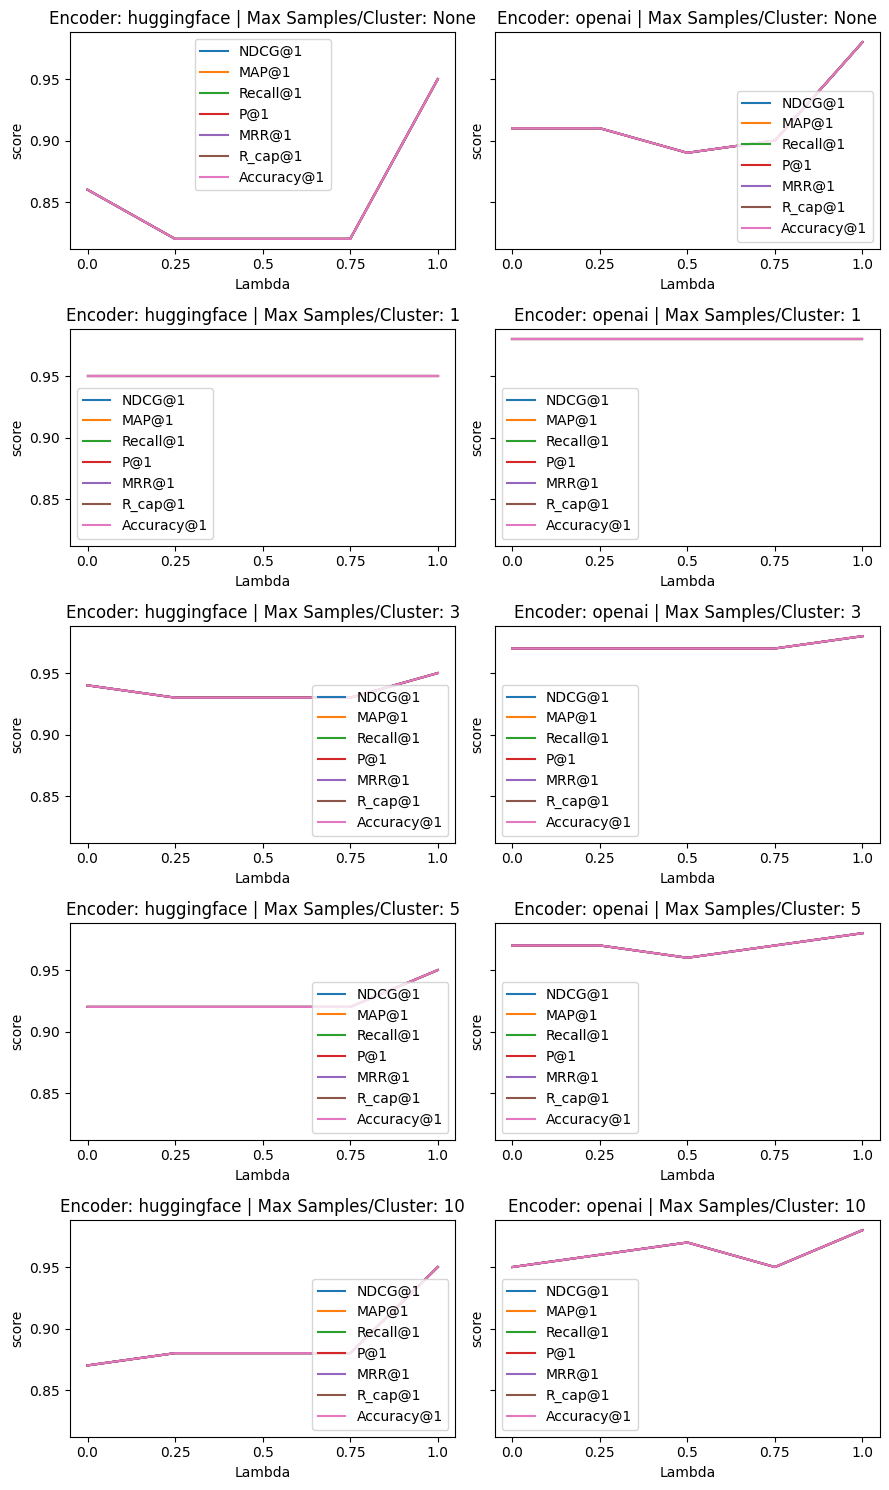

In [21]:
fig, axes = plt.subplots(len(cfg['cluster_chunker_max_samples_per_cluster']), len(cfg['encoders']), figsize=(9, 15), sharey=True)
df_sub = get_hyperparam_comparison(df, 'cluster_chunker')
for i, max_samples_per_chunker in enumerate(cfg['cluster_chunker_max_samples_per_cluster']):
    for j, encoder in enumerate(cfg['encoders']):
        if max_samples_per_chunker is None:
            df_slice = df_sub[(df_sub['max_samples_per_cluster'].isnull()) & (df_sub['encoder']==encoder)].sort_values('lamda', ascending=True)
        else:
            df_slice = df_sub[(df_sub['max_samples_per_cluster']==max_samples_per_chunker) & (df_sub['encoder']==encoder)].sort_values('lamda', ascending=True)
        xticks = range(len(df_slice['lamda']))
        for metric in plot_metrics:
            if metric in {'Latency','Hole@k'}: continue
            metric1 = metric.split('@')[0]+'@1'
            axes[i, j].plot(xticks, df_slice[metric1], label=metric1)
        axes[i, j].set_title(f'Encoder: {encoder} | Max Samples/Cluster: {max_samples_per_chunker}')
        axes[i, j].set_xlabel('Lambda')
        axes[i, j].set_xticks(xticks)
        axes[i, j].set_xticklabels(df_slice['lamda'])
        axes[i, j].set_ylabel('score')
        axes[i, j].legend()
fig.tight_layout()
plt.show()

#### Max samples/cluster

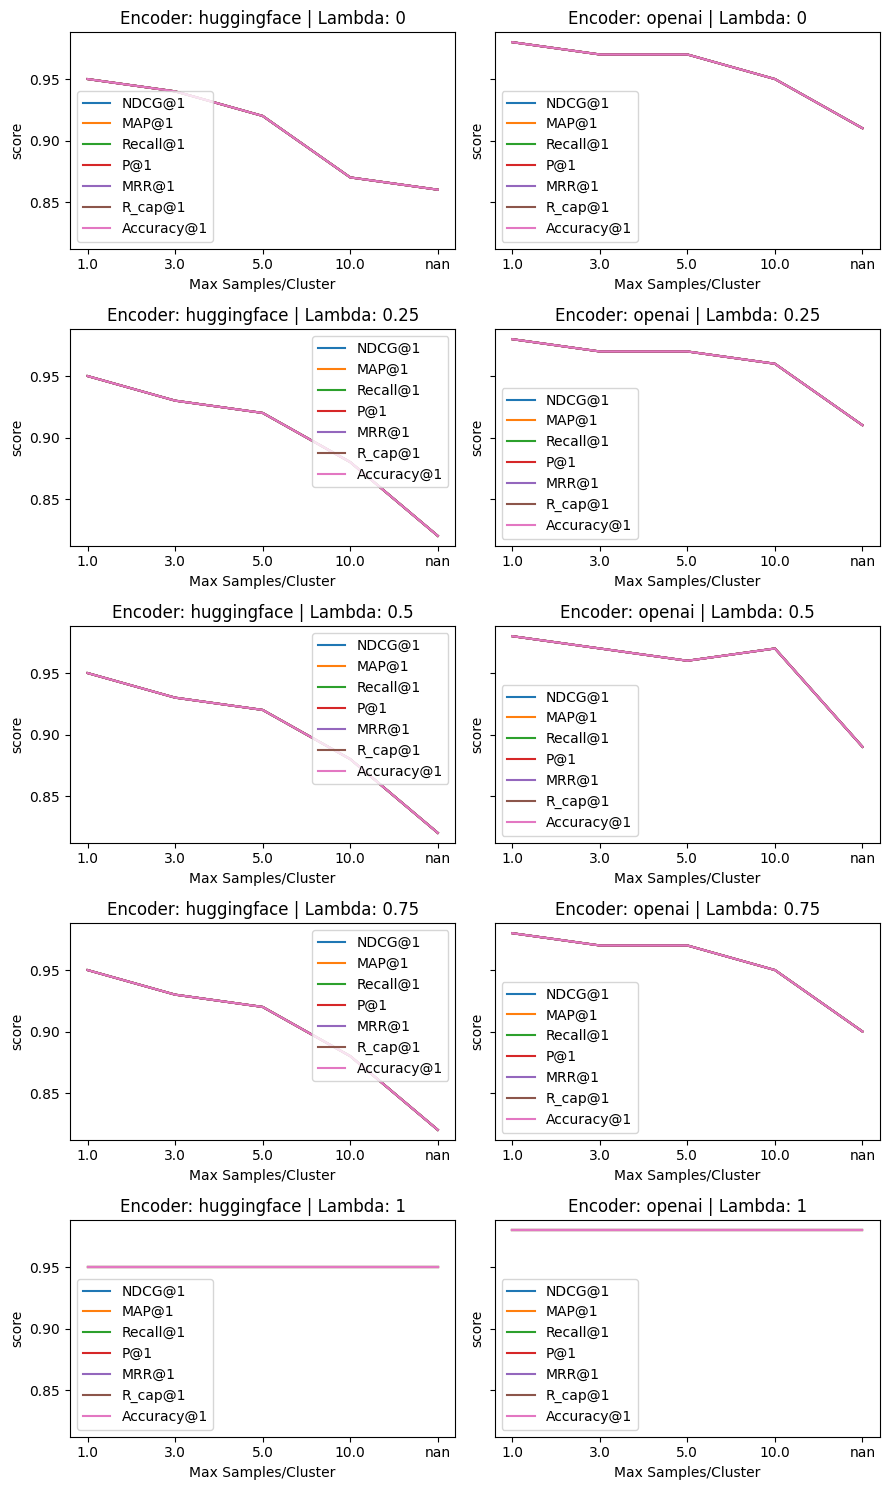

In [22]:
fig, axes = plt.subplots(len(cfg['cluster_chunker_lamda']), len(cfg['encoders']), figsize=(9, 15), sharey=True)
df_sub = get_hyperparam_comparison(df, 'cluster_chunker')
for i, lamda in enumerate(cfg['cluster_chunker_lamda']):
    for j, encoder in enumerate(cfg['encoders']):
        df_slice = df_sub[(df_sub['lamda']==lamda) & (df_sub['encoder']==encoder)].sort_values('max_samples_per_cluster', ascending=True)
        xticks = range(len(df_slice['max_samples_per_cluster']))
        for metric in plot_metrics:
            if metric in {'Latency','Hole@k'}: continue
            metric1 = metric.split('@')[0]+'@1'
            axes[i, j].plot(xticks, df_slice[metric1], label=metric1)
        axes[i, j].set_title(f'Encoder: {encoder} | Lambda: {lamda}')
        axes[i, j].set_xlabel('Max Samples/Cluster')
        axes[i, j].set_xticks(xticks)
        axes[i, j].set_xticklabels(df_slice['max_samples_per_cluster'])
        axes[i, j].set_ylabel('score')
        axes[i, j].legend()
fig.tight_layout()
plt.show()

### Langchain Chunker

#### Breakpoint threshold

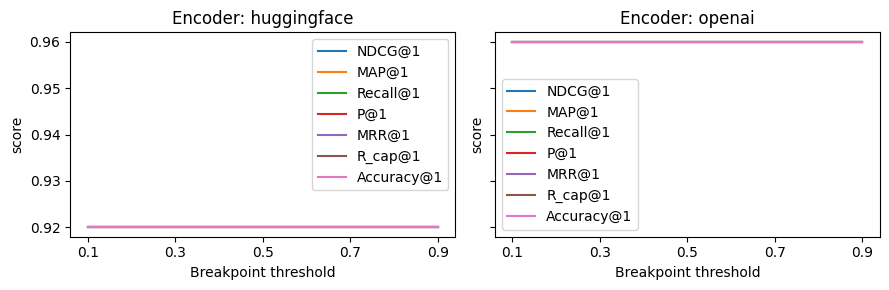

In [23]:
fig, axes = plt.subplots(1, len(cfg['encoders']), figsize=(9, 3), sharey=True)
df_sub = get_hyperparam_comparison(df, 'langchain_chunker')
for j, encoder in enumerate(cfg['encoders']):
    df_slice = df_sub[df_sub['encoder']==encoder].sort_values('breakpoint_threshold_amount', ascending=True)
    xticks = range(len(df_slice['breakpoint_threshold_amount']))
    for metric in plot_metrics:
        if metric in {'Latency','Hole@k'}: continue
        metric1 = metric.split('@')[0]+'@1'
        axes[j].plot(xticks, df_slice[metric1], label=metric1)
    axes[j].set_title(f'Encoder: {encoder}')
    axes[j].set_xlabel('Breakpoint threshold')
    axes[j].set_xticks(xticks)
    axes[j].set_xticklabels(df_slice['breakpoint_threshold_amount'])
    axes[j].set_ylabel('score')
    axes[j].legend()
fig.tight_layout()
plt.show()

### Sentence Chunker

#### k

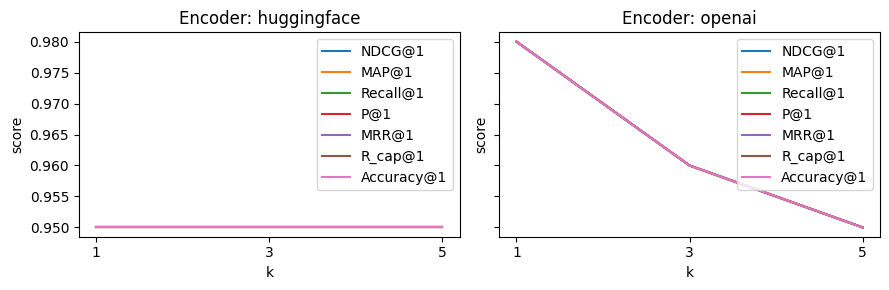

In [24]:
fig, axes = plt.subplots(1, len(cfg['encoders']), figsize=(9, 3), sharey=True)
df_sub = get_hyperparam_comparison(df, 'sentence_chunker')
for j, encoder in enumerate(cfg['encoders']):
    df_slice = df_sub[df_sub['encoder']==encoder].sort_values('sentence_chunker_k', ascending=True)
    xticks = range(len(df_slice['sentence_chunker_k']))
    for metric in plot_metrics:
        if metric in {'Latency','Hole@k'}: continue
        metric1 = metric.split('@')[0]+'@1'
        axes[j].plot(xticks, df_slice[metric1], label=metric1)
    axes[j].set_title(f'Encoder: {encoder}')
    axes[j].set_xlabel('k')
    axes[j].set_xticks(xticks)
    axes[j].set_xticklabels(df_slice['sentence_chunker_k'])
    axes[j].set_ylabel('score')
    axes[j].legend()
fig.tight_layout()
plt.show()